# Food Delivery Time Prediction - Complete Professional Data Science Analysis

**Author:** Data Science Team  
**Date:** October 2025  
**Objective:** Predict delivery times for food orders using comprehensive EDA, feature engineering, and model benchmarking

## Table of Contents
1. [Dataset Overview & Initial Inspection](#1)
2. [Data Quality Assessment](#2)
3. [Missing Data & Error Handling](#3)
4. [Univariate Analysis](#4)
5. [Bivariate Analysis](#5)
6. [Multivariate Analysis](#6)
7. [Dimensionality Reduction (PCA)](#7)
8. [Professional Data Science Report](#8)
9. [Feature Engineering](#9)
10. [Model Building & Benchmarking](#10)

---

## 0. Setup & Imports


In [75]:
# Data manipulation and analysis
import pandas as pd
import numpy as np
from pathlib import Path

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Statistical analysis
from scipy import stats
from scipy.stats import skew, kurtosis, normaltest, shapiro

# Preprocessing
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.feature_selection import SelectKBest, f_regression, mutual_info_regression

# Models
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

# Metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, mean_absolute_percentage_error

# Set display options
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
pd.set_option('display.float_format', '{:.2f}'.format)

# Set plotting style
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

# Configure image saving
import os
from datetime import datetime

# Create images directory if it doesn't exist
images_dir = "images"
os.makedirs(images_dir, exist_ok=True)

# Counter for automatic image naming
image_counter = 0

def save_and_show(fig=None, filename=None, dpi=300, bbox_inches='tight'):
    """
    Save figure to images folder and display it
    """
    global image_counter
    
    if fig is None:
        fig = plt.gcf()
    
    if filename is None:
        image_counter += 1
        timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")
        filename = f"eda_plot_{image_counter:02d}_{timestamp}.png"
    
    # Ensure filename has .png extension
    if not filename.endswith('.png'):
        filename += '.png'
    
    # Save the figure
    filepath = os.path.join(images_dir, filename)
    fig.savefig(filepath, dpi=dpi, bbox_inches=bbox_inches, facecolor='white')
    print(f"Image saved: {filepath}")
    
    # Show the figure
    plt.show()

print("All libraries imported successfully")
print(f"Pandas version: {pd.__version__}")
print(f"NumPy version: {np.__version__}")
print(f"Images will be saved to: {os.path.abspath(images_dir)}")


All libraries imported successfully
Pandas version: 2.3.3
NumPy version: 2.3.3
Images will be saved to: /Users/mv/repos/delivery-time-prediction/notebooks/images


<a id='1'></a>
## 1. Dataset Overview & Initial Inspection

Understanding the structure, size, and basic characteristics of our dataset is the foundation of any analysis.


In [76]:
# Load the dataset
data_path = Path("../data/Food_Delivery_Times.csv")
df = pd.read_csv(data_path)

# Create a copy for later comparison
df_original = df.copy()

print("="*80)
print("DATASET LOADED SUCCESSFULLY")
print("="*80)
print(f"\nDataset Shape: {df.shape[0]} rows × {df.shape[1]} columns")
print(f"Memory Usage: {df.memory_usage(deep=True).sum() / 1024:.2f} KB")
print(f"\nFirst 5 rows:")
display(df.head())
print(f"\nLast 5 rows:")
display(df.tail())


DATASET LOADED SUCCESSFULLY

Dataset Shape: 1000 rows × 9 columns
Memory Usage: 249.64 KB

First 5 rows:


,Order_ID,Distance_km,Weather,Traffic_Level,Time_of_Day,Vehicle_Type,Preparation_Time_min,Courier_Experience_yrs,Delivery_Time_min
0,522,7.93,Windy,Low,Afternoon,Scooter,12,1.00,43
1,738,16.42,Clear,Medium,Evening,Bike,20,2.00,84
2,741,9.52,Foggy,Low,Night,Scooter,28,1.00,59
3,661,7.44,Rainy,Medium,Afternoon,Scooter,5,1.00,37
4,412,19.03,Clear,Low,Morning,Bike,16,5.00,68



Last 5 rows:


,Order_ID,Distance_km,Weather,Traffic_Level,Time_of_Day,Vehicle_Type,Preparation_Time_min,Courier_Experience_yrs,Delivery_Time_min
995,107,8.50,Clear,High,Evening,Car,13,3.00,54
996,271,16.28,Rainy,Low,Morning,Scooter,8,9.00,71
997,861,15.62,Snowy,High,Evening,Scooter,26,2.00,81
998,436,14.17,Clear,Low,Afternoon,Bike,8,0.00,55
999,103,6.63,Foggy,Low,Night,Scooter,24,3.00,58


In [77]:
# Comprehensive dataset information
print("="*80)
print("DATASET STRUCTURE AND DATA TYPES")
print("="*80)
df.info()

print("\n" + "="*80)
print("COLUMN NAMES AND TYPES")
print("="*80)
for idx, (col, dtype) in enumerate(zip(df.columns, df.dtypes), 1):
    null_count = df[col].isnull().sum()
    null_pct = (null_count / len(df)) * 100
    print(f"{idx:2d}. {col:30s} | {str(dtype):10s} | Nulls: {null_count:4d} ({null_pct:5.2f}%)")


DATASET STRUCTURE AND DATA TYPES
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Order_ID                1000 non-null   int64  
 1   Distance_km             1000 non-null   float64
 2   Weather                 970 non-null    object 
 3   Traffic_Level           970 non-null    object 
 4   Time_of_Day             970 non-null    object 
 5   Vehicle_Type            1000 non-null   object 
 6   Preparation_Time_min    1000 non-null   int64  
 7   Courier_Experience_yrs  970 non-null    float64
 8   Delivery_Time_min       1000 non-null   int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 70.4+ KB

COLUMN NAMES AND TYPES
 1. Order_ID                       | int64      | Nulls:    0 ( 0.00%)
 2. Distance_km                    | float64    | Nulls:    0 ( 0.00%)
 3. Weather                        | object     | 

In [78]:
# Statistical summary for numerical features
print("="*80)
print("NUMERICAL FEATURES - STATISTICAL SUMMARY")
print("="*80)
display(df.describe().T)

# Statistical summary for categorical features
print("\n" + "="*80)
print("CATEGORICAL FEATURES - STATISTICAL SUMMARY")
print("="*80)
display(df.describe(include='object').T)


NUMERICAL FEATURES - STATISTICAL SUMMARY


,count,mean,std,min,25%,50%,75%,max
Order_ID,1000.00,500.50,288.82,1.00,250.75,500.50,750.25,1000.00
Distance_km,1000.00,10.06,5.70,0.59,5.11,10.19,15.02,19.99
Preparation_Time_min,1000.00,16.98,7.20,5.00,11.00,17.00,23.00,29.00
Courier_Experience_yrs,970.00,4.58,2.91,0.00,2.00,5.00,7.00,9.00
Delivery_Time_min,1000.00,56.73,22.07,8.00,41.00,55.50,71.00,153.00



CATEGORICAL FEATURES - STATISTICAL SUMMARY


,count,unique,top,freq
Weather,970,5,Clear,470
Traffic_Level,970,3,Medium,390
Time_of_Day,970,4,Morning,308
Vehicle_Type,1000,3,Bike,503


<a id='2'></a>
## 2. Data Quality Assessment

Examining data quality issues including duplicates, unique values, and data integrity checks.


In [79]:
# Check for duplicate rows
print("="*80)
print("DUPLICATE ANALYSIS")
print("="*80)
duplicates = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")
if duplicates > 0:
    print(f"Percentage of duplicates: {(duplicates/len(df))*100:.2f}%")
    print("\nSample duplicate rows:")
    display(df[df.duplicated(keep=False)].head(10))
else:
    print("No duplicate rows found")

# Check for duplicate Order_IDs
duplicate_ids = df['Order_ID'].duplicated().sum()
print(f"\nDuplicate Order IDs: {duplicate_ids}")
if duplicate_ids > 0:
    print("Warning: Duplicate Order IDs found")


DUPLICATE ANALYSIS
Number of duplicate rows: 0
No duplicate rows found

Duplicate Order IDs: 0


In [80]:
# Check unique values and cardinality
print("="*80)
print("UNIQUE VALUES AND CARDINALITY")
print("="*80)
for col in df.columns:
    unique_count = df[col].nunique()
    unique_pct = (unique_count / len(df)) * 100
    print(f"{col:30s} | Unique: {unique_count:5d} ({unique_pct:6.2f}%)")
    
    # Show unique values for categorical columns with few unique values
    if df[col].dtype == 'object' and unique_count <= 10:
        print(f"    Values: {sorted(df[col].dropna().unique())}")
    print()


UNIQUE VALUES AND CARDINALITY
Order_ID                       | Unique:  1000 (100.00%)

Distance_km                    | Unique:   785 ( 78.50%)

Weather                        | Unique:     5 (  0.50%)
    Values: ['Clear', 'Foggy', 'Rainy', 'Snowy', 'Windy']

Traffic_Level                  | Unique:     3 (  0.30%)
    Values: ['High', 'Low', 'Medium']

Time_of_Day                    | Unique:     4 (  0.40%)
    Values: ['Afternoon', 'Evening', 'Morning', 'Night']

Vehicle_Type                   | Unique:     3 (  0.30%)
    Values: ['Bike', 'Car', 'Scooter']

Preparation_Time_min           | Unique:    25 (  2.50%)

Courier_Experience_yrs         | Unique:    10 (  1.00%)

Delivery_Time_min              | Unique:   108 ( 10.80%)



In [81]:
# Data integrity checks for numerical columns
print("="*80)
print("DATA INTEGRITY CHECKS - NUMERICAL FEATURES")
print("="*80)

numerical_cols = df.select_dtypes(include=[np.number]).columns

for col in numerical_cols:
    print(f"\n{col}:")
    print(f"  Min: {df[col].min():.2f}")
    print(f"  Max: {df[col].max():.2f}")
    print(f"  Range: {df[col].max() - df[col].min():.2f}")
    
    # Check for negative values where they shouldn't exist
    if col != 'Order_ID':
        neg_count = (df[col] < 0).sum()
        if neg_count > 0:
            print(f"  ⚠️ Negative values found: {neg_count}")
    
    # Check for zero values
    zero_count = (df[col] == 0).sum()
    if zero_count > 0:
        print(f"  Zero values: {zero_count} ({(zero_count/len(df))*100:.2f}%)")


DATA INTEGRITY CHECKS - NUMERICAL FEATURES

Order_ID:
  Min: 1.00
  Max: 1000.00
  Range: 999.00

Distance_km:
  Min: 0.59
  Max: 19.99
  Range: 19.40

Preparation_Time_min:
  Min: 5.00
  Max: 29.00
  Range: 24.00

Courier_Experience_yrs:
  Min: 0.00
  Max: 9.00
  Range: 9.00
  Zero values: 91 (9.10%)

Delivery_Time_min:
  Min: 8.00
  Max: 153.00
  Range: 145.00


<a id='3'></a>
## 3. Missing Data & Error Handling

Since the dataset is fairly small (1000 rows), we need to be careful about how we handle missing data to preserve as much information as possible.


MISSING DATA ANALYSIS


,Column,Missing_Count,Missing_Percentage,Data_Type
Weather,Weather,30,3.00,object
Traffic_Level,Traffic_Level,30,3.00,object
Time_of_Day,Time_of_Day,30,3.00,object
Courier_Experience_yrs,Courier_Experience_yrs,30,3.00,float64


Image saved: images/missing_data_analysis.png


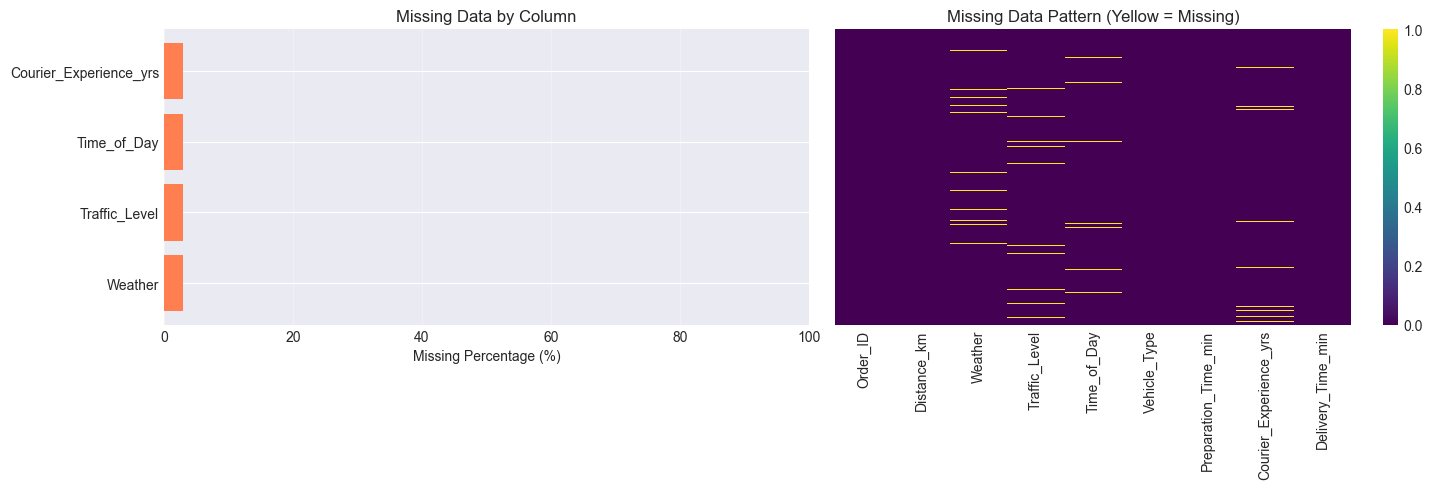

In [82]:
# Comprehensive missing data analysis
print("="*80)
print("MISSING DATA ANALYSIS")
print("="*80)

missing_data = pd.DataFrame({
    'Column': df.columns,
    'Missing_Count': df.isnull().sum(),
    'Missing_Percentage': (df.isnull().sum() / len(df)) * 100,
    'Data_Type': df.dtypes
})
missing_data = missing_data[missing_data['Missing_Count'] > 0].sort_values('Missing_Percentage', ascending=False)

if len(missing_data) > 0:
    display(missing_data)
    
    # Visualize missing data
    fig, axes = plt.subplots(1, 2, figsize=(15, 5))
    
    # Bar plot
    axes[0].barh(missing_data['Column'], missing_data['Missing_Percentage'], color='coral')
    axes[0].set_xlabel('Missing Percentage (%)')
    axes[0].set_title('Missing Data by Column')
    axes[0].set_xlim(0, 100)  # Set x-axis limits from 0 to 100%
    axes[0].grid(axis='x', alpha=0.3)
    
    # Heatmap of missing data patterns
    sns.heatmap(df.isnull(), yticklabels=False, cbar=True, cmap='viridis', ax=axes[1])
    axes[1].set_title('Missing Data Pattern (Yellow = Missing)')
    
    plt.tight_layout()
    save_and_show(filename="missing_data_analysis")
else:
    print("No missing data found")


In [83]:
# Handle missing data strategically
print("="*80)
print("MISSING DATA IMPUTATION STRATEGY")
print("="*80)

print(f"Dataset size before handling missing data: {len(df)} rows\n")

# Mode Impute for Categorical Columns
categorical_cols = df.select_dtypes(include='object').columns
for col in categorical_cols:
    missing_pct = (df[col].isnull().sum() / len(df)) * 100
    if 0 < missing_pct < 5:
        mode_value = df[col].mode()[0]
        df[col].fillna(mode_value, inplace=True)
        print(f"{col}: Filled {missing_pct:.2f}% missing values with mode = '{mode_value}'")

# Median impute for numerical columns
for col in numerical_cols:
    if col != 'Order_ID':
        missing_pct = (df[col].isnull().sum() / len(df)) * 100
        if 0 < missing_pct < 5:
            median_value = df[col].median()
            df[col].fillna(median_value, inplace=True)
            print(f"{col}: Filled {missing_pct:.2f}% missing values with median = {median_value:.2f}")

print(f"\nDataset size after handling missing data: {len(df)} rows")
print(f"Remaining missing values: {df.isnull().sum().sum()}")

if df.isnull().sum().sum() == 0:
    print("All missing values have been handled")


MISSING DATA IMPUTATION STRATEGY
Dataset size before handling missing data: 1000 rows

Weather: Filled 3.00% missing values with mode = 'Clear'
Traffic_Level: Filled 3.00% missing values with mode = 'Medium'
Time_of_Day: Filled 3.00% missing values with mode = 'Morning'
Courier_Experience_yrs: Filled 3.00% missing values with median = 5.00

Dataset size after handling missing data: 1000 rows
Remaining missing values: 0
All missing values have been handled


<a id='4'></a>
## 4. Univariate Analysis

Analyzing each feature individually to understand distributions, central tendencies, and spread.


TARGET VARIABLE ANALYSIS: Delivery_Time_min
Image saved: images/target_variable_analysis.png


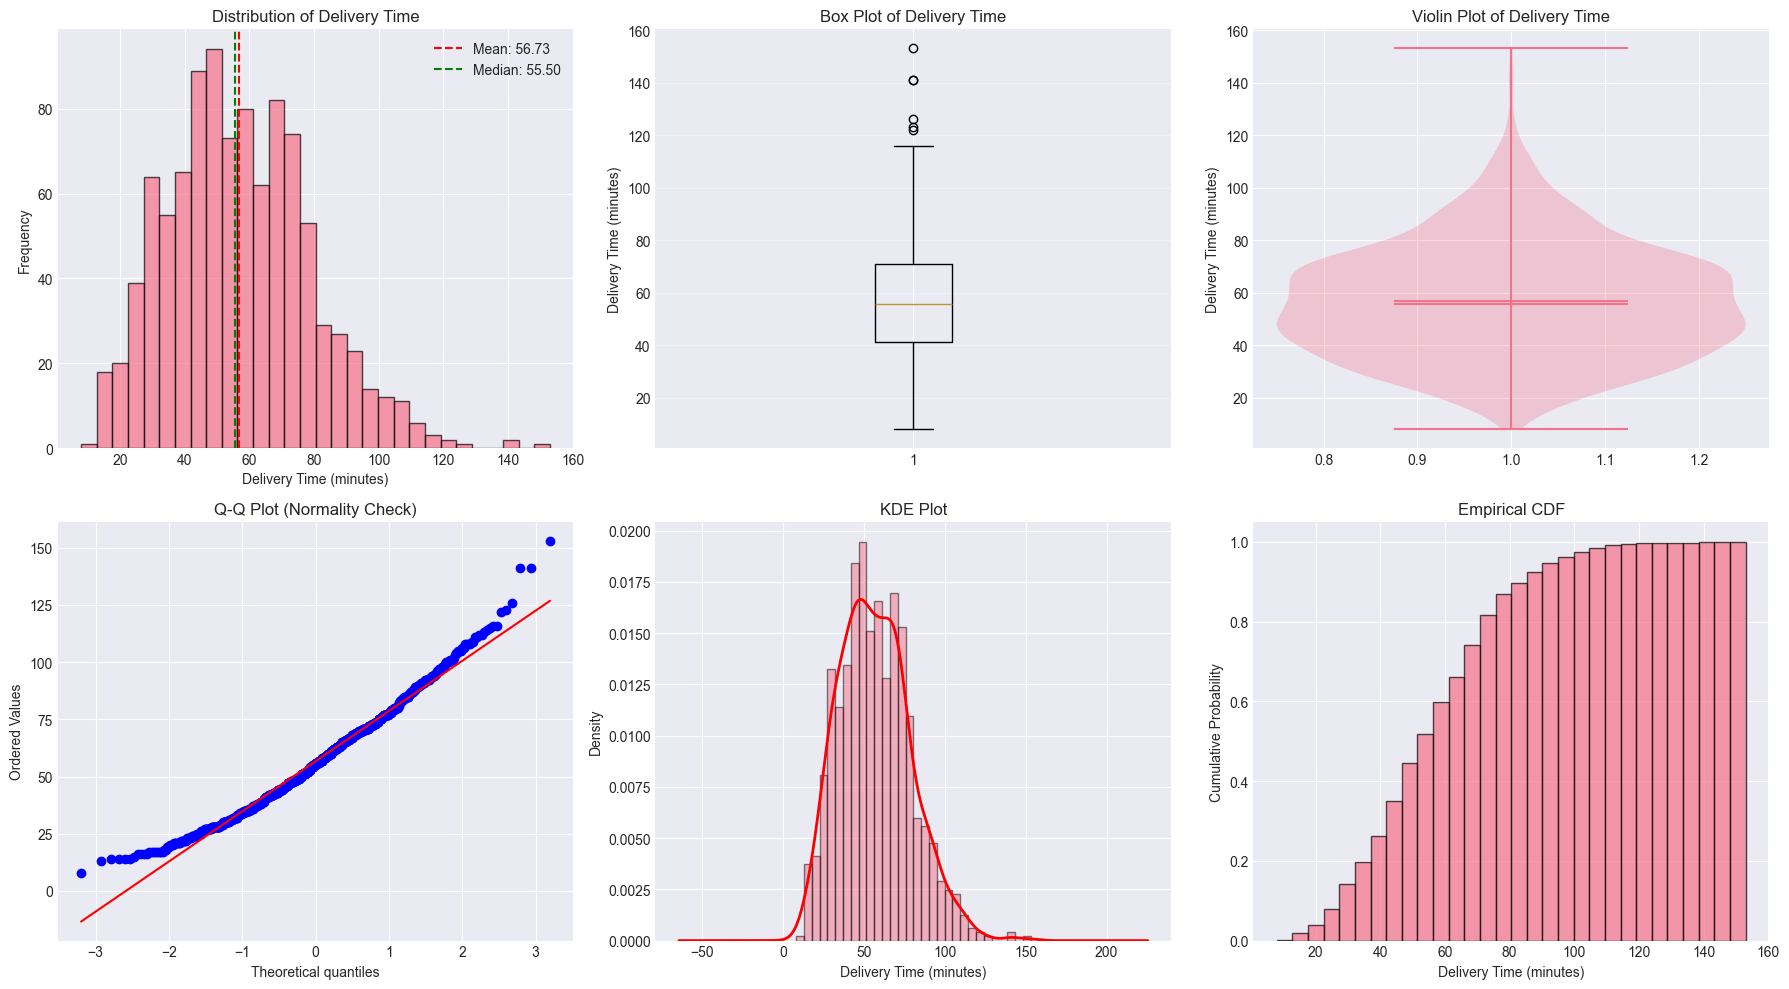


Statistical Summary:
Mean: 56.73 minutes
Median: 55.50 minutes
Mode: 71.00 minutes
Std Dev: 22.07 minutes
Variance: 487.13
Skewness: 0.5073 (Right-skewed)
Kurtosis: 0.2913 (Leptokurtic)
Range: 145.00 minutes
IQR: 30.00 minutes
CV: 38.90%

🔬 Shapiro-Wilk Normality Test: p-value = 0.000000
   ➜ Data is NOT normally distributed (p < 0.05)


In [84]:
# Univariate analysis for Target Variable
print("="*80)
print("TARGET VARIABLE ANALYSIS: Delivery_Time_min")
print("="*80)

target = 'Delivery_Time_min'
fig, axes = plt.subplots(2, 3, figsize=(18, 10))

# Histogram
axes[0, 0].hist(df[target], bins=30, edgecolor='black', alpha=0.7)
axes[0, 0].set_title('Distribution of Delivery Time')
axes[0, 0].set_xlabel('Delivery Time (minutes)')
axes[0, 0].set_ylabel('Frequency')
axes[0, 0].axvline(df[target].mean(), color='red', linestyle='--', label=f'Mean: {df[target].mean():.2f}')
axes[0, 0].axvline(df[target].median(), color='green', linestyle='--', label=f'Median: {df[target].median():.2f}')
axes[0, 0].legend()

# Box plot
axes[0, 1].boxplot(df[target], vert=True)
axes[0, 1].set_title('Box Plot of Delivery Time')
axes[0, 1].set_ylabel('Delivery Time (minutes)')
axes[0, 1].grid(axis='y', alpha=0.3)

# Violin plot
axes[0, 2].violinplot(df[target], vert=True, showmeans=True, showmedians=True)
axes[0, 2].set_title('Violin Plot of Delivery Time')
axes[0, 2].set_ylabel('Delivery Time (minutes)')

# Q-Q plot
from scipy.stats import probplot
probplot(df[target], dist="norm", plot=axes[1, 0])
axes[1, 0].set_title('Q-Q Plot (Normality Check)')

# KDE plot
axes[1, 1].hist(df[target], bins=30, density=True, alpha=0.5, edgecolor='black')
df[target].plot(kind='kde', ax=axes[1, 1], color='red', linewidth=2)
axes[1, 1].set_title('KDE Plot')
axes[1, 1].set_xlabel('Delivery Time (minutes)')
axes[1, 1].set_ylabel('Density')

# ECDF
axes[1, 2].hist(df[target], bins=30, cumulative=True, density=True, alpha=0.7, edgecolor='black')
axes[1, 2].set_title('Empirical CDF')
axes[1, 2].set_xlabel('Delivery Time (minutes)')
axes[1, 2].set_ylabel('Cumulative Probability')

plt.tight_layout()
save_and_show(filename="target_variable_analysis")

# Statistical measures
print(f"\nStatistical Summary:")
print(f"Mean: {df[target].mean():.2f} minutes")
print(f"Median: {df[target].median():.2f} minutes")
print(f"Mode: {df[target].mode().values[0]:.2f} minutes")
print(f"Std Dev: {df[target].std():.2f} minutes")
print(f"Variance: {df[target].var():.2f}")
print(f"Skewness: {df[target].skew():.4f} ({'Right-skewed' if df[target].skew() > 0 else 'Left-skewed'})")
print(f"Kurtosis: {df[target].kurtosis():.4f} ({'Leptokurtic' if df[target].kurtosis() > 0 else 'Platykurtic'})")
print(f"Range: {df[target].max() - df[target].min():.2f} minutes")
print(f"IQR: {df[target].quantile(0.75) - df[target].quantile(0.25):.2f} minutes")
print(f"CV: {(df[target].std() / df[target].mean()) * 100:.2f}%")

# Normality tests
stat_shapiro, p_shapiro = shapiro(df[target])
print(f"\n🔬 Shapiro-Wilk Normality Test: p-value = {p_shapiro:.6f}")
if p_shapiro < 0.05:
    print("   ➜ Data is NOT normally distributed (p < 0.05)")
else:
    print("   ➜ Data follows normal distribution (p ≥ 0.05)")


NUMERICAL FEATURES - UNIVARIATE ANALYSIS

Distance_km:
  Mean: 10.06 | Median: 10.19 | Std: 5.70
  Skewness: 0.0388 | Kurtosis: -1.2292
  Min: 0.59 | Max: 19.99 | Range: 19.40

Preparation_Time_min:
  Mean: 16.98 | Median: 17.00 | Std: 7.20
  Skewness: 0.0300 | Kurtosis: -1.2369
  Min: 5.00 | Max: 29.00 | Range: 24.00

Courier_Experience_yrs:
  Mean: 4.59 | Median: 5.00 | Std: 2.87
  Skewness: -0.0426 | Kurtosis: -1.2137
  Min: 0.00 | Max: 9.00 | Range: 9.00
Image saved: images/numerical_features_univariate.png


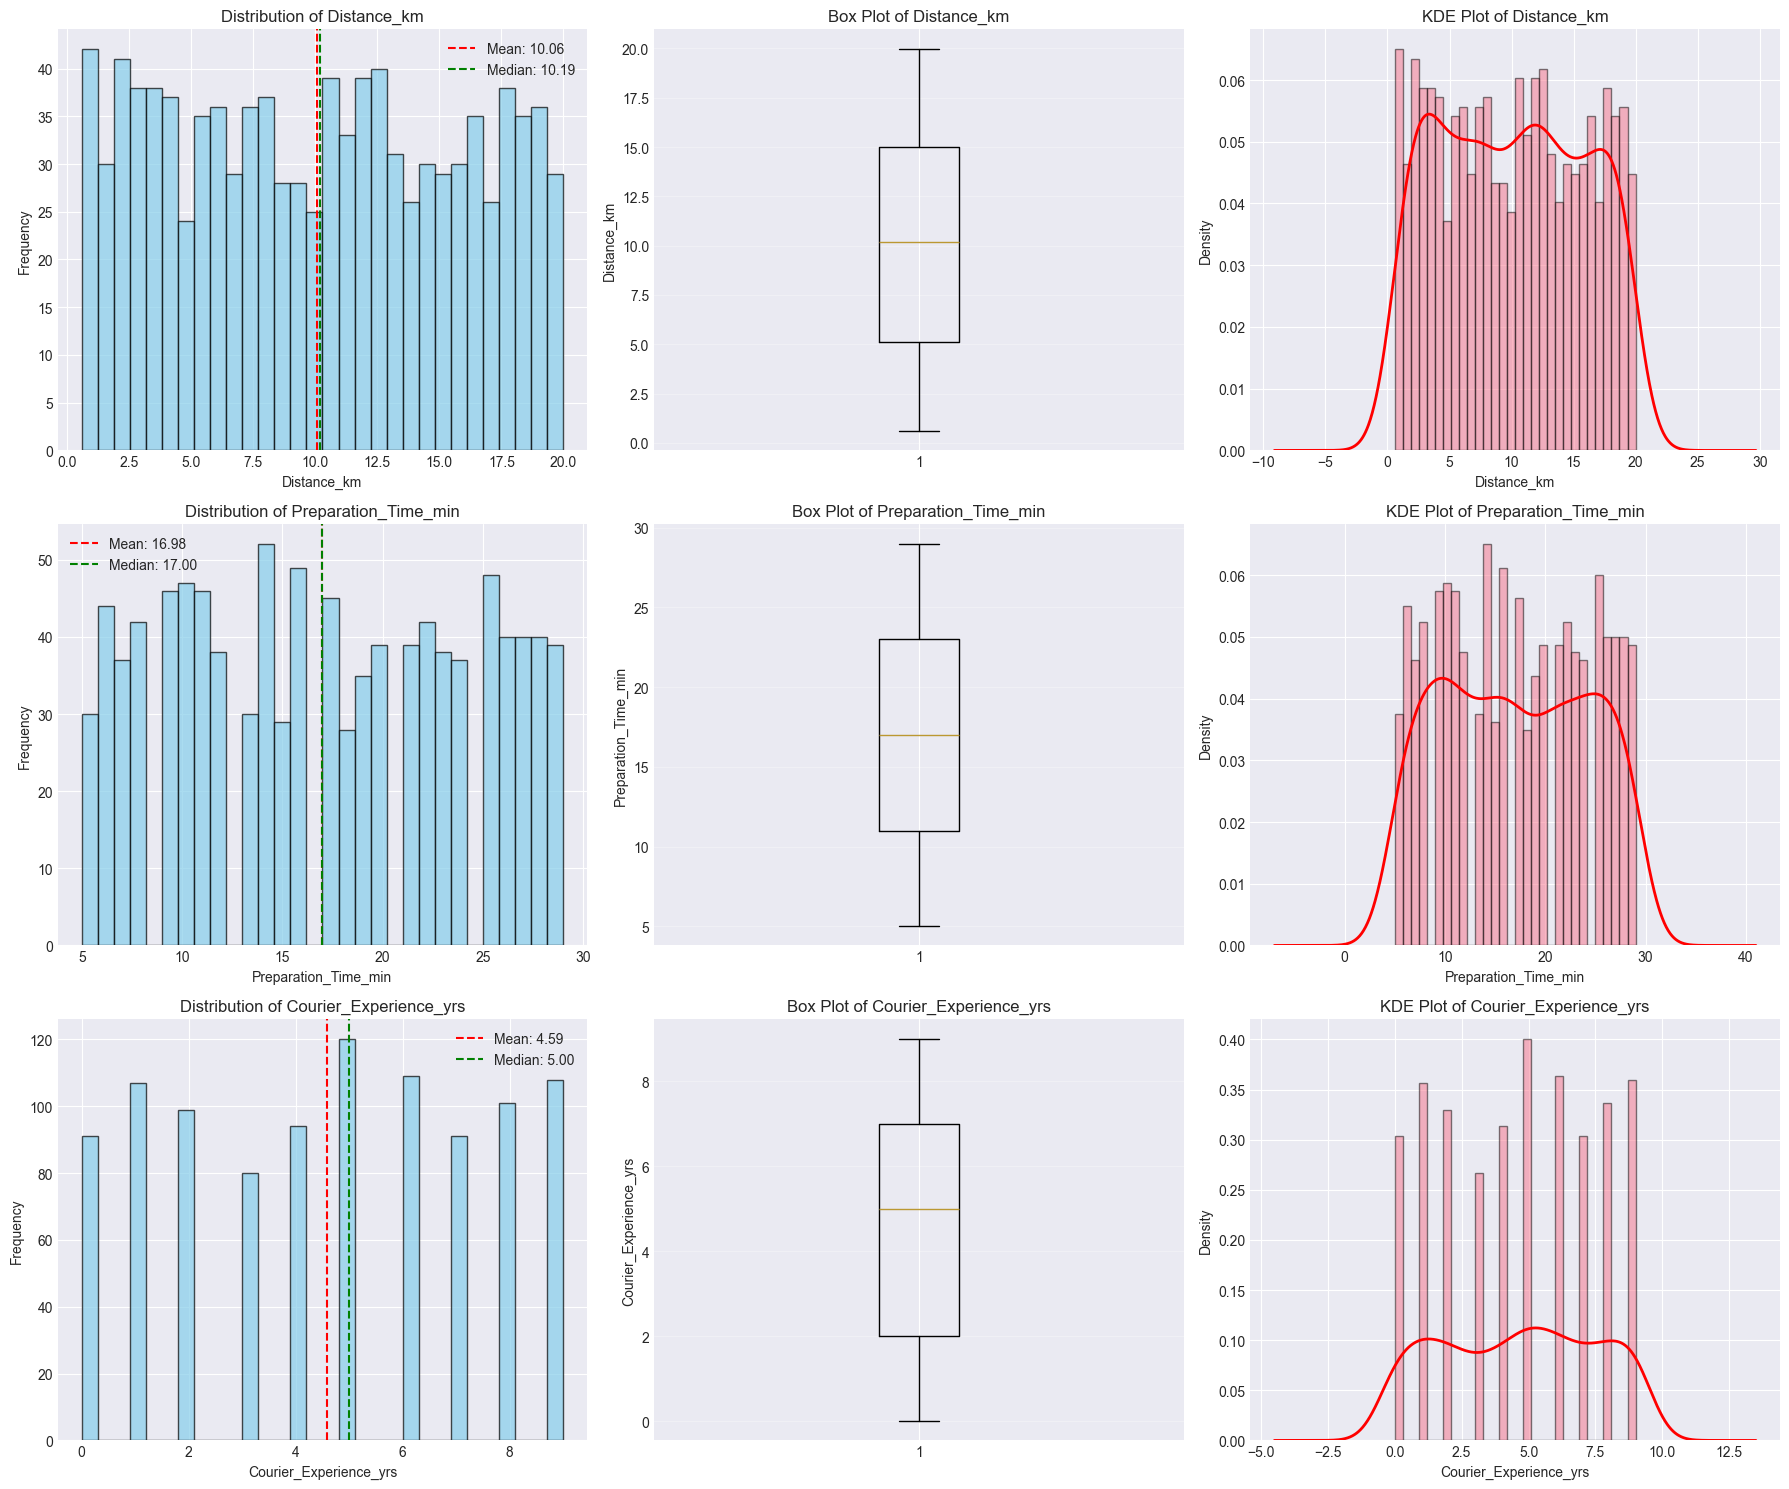

In [85]:
# Univariate analysis for numerical features
print("="*80)
print("NUMERICAL FEATURES - UNIVARIATE ANALYSIS")
print("="*80)

num_features = [col for col in numerical_cols if col not in ['Order_ID', 'Delivery_Time_min']]

fig, axes = plt.subplots(len(num_features), 3, figsize=(18, 5*len(num_features)))
if len(num_features) == 1:
    axes = axes.reshape(1, -1)

for idx, col in enumerate(num_features):
    # Histogram
    axes[idx, 0].hist(df[col], bins=30, edgecolor='black', alpha=0.7, color='skyblue')
    axes[idx, 0].set_title(f'Distribution of {col}')
    axes[idx, 0].set_xlabel(col)
    axes[idx, 0].set_ylabel('Frequency')
    axes[idx, 0].axvline(df[col].mean(), color='red', linestyle='--', label=f'Mean: {df[col].mean():.2f}')
    axes[idx, 0].axvline(df[col].median(), color='green', linestyle='--', label=f'Median: {df[col].median():.2f}')
    axes[idx, 0].legend()
    
    # Box plot
    axes[idx, 1].boxplot(df[col], vert=True)
    axes[idx, 1].set_title(f'Box Plot of {col}')
    axes[idx, 1].set_ylabel(col)
    axes[idx, 1].grid(axis='y', alpha=0.3)
    
    # KDE plot
    axes[idx, 2].hist(df[col], bins=30, density=True, alpha=0.5, edgecolor='black')
    df[col].plot(kind='kde', ax=axes[idx, 2], color='red', linewidth=2)
    axes[idx, 2].set_title(f'KDE Plot of {col}')
    axes[idx, 2].set_xlabel(col)
    axes[idx, 2].set_ylabel('Density')
    
    # Print statistics
    print(f"\n{col}:")
    print(f"  Mean: {df[col].mean():.2f} | Median: {df[col].median():.2f} | Std: {df[col].std():.2f}")
    print(f"  Skewness: {df[col].skew():.4f} | Kurtosis: {df[col].kurtosis():.4f}")
    print(f"  Min: {df[col].min():.2f} | Max: {df[col].max():.2f} | Range: {df[col].max() - df[col].min():.2f}")

plt.tight_layout()
save_and_show(filename="numerical_features_univariate")


CATEGORICAL FEATURES - UNIVARIATE ANALYSIS

Weather:
Weather
Clear    500
Rainy    204
Foggy    103
Snowy     97
Windy     96
Name: count, dtype: int64
  Unique values: 5
  Mode: Clear
  Most common: Clear (50.0%)

Traffic_Level:
Traffic_Level
Medium    420
Low       383
High      197
Name: count, dtype: int64
  Unique values: 3
  Mode: Medium
  Most common: Medium (42.0%)

Time_of_Day:
Time_of_Day
Morning      338
Evening      293
Afternoon    284
Night         85
Name: count, dtype: int64
  Unique values: 4
  Mode: Morning
  Most common: Morning (33.8%)

Vehicle_Type:
Vehicle_Type
Bike       503
Scooter    302
Car        195
Name: count, dtype: int64
  Unique values: 3
  Mode: Bike
  Most common: Bike (50.3%)
Image saved: images/categorical_features_univariate.png


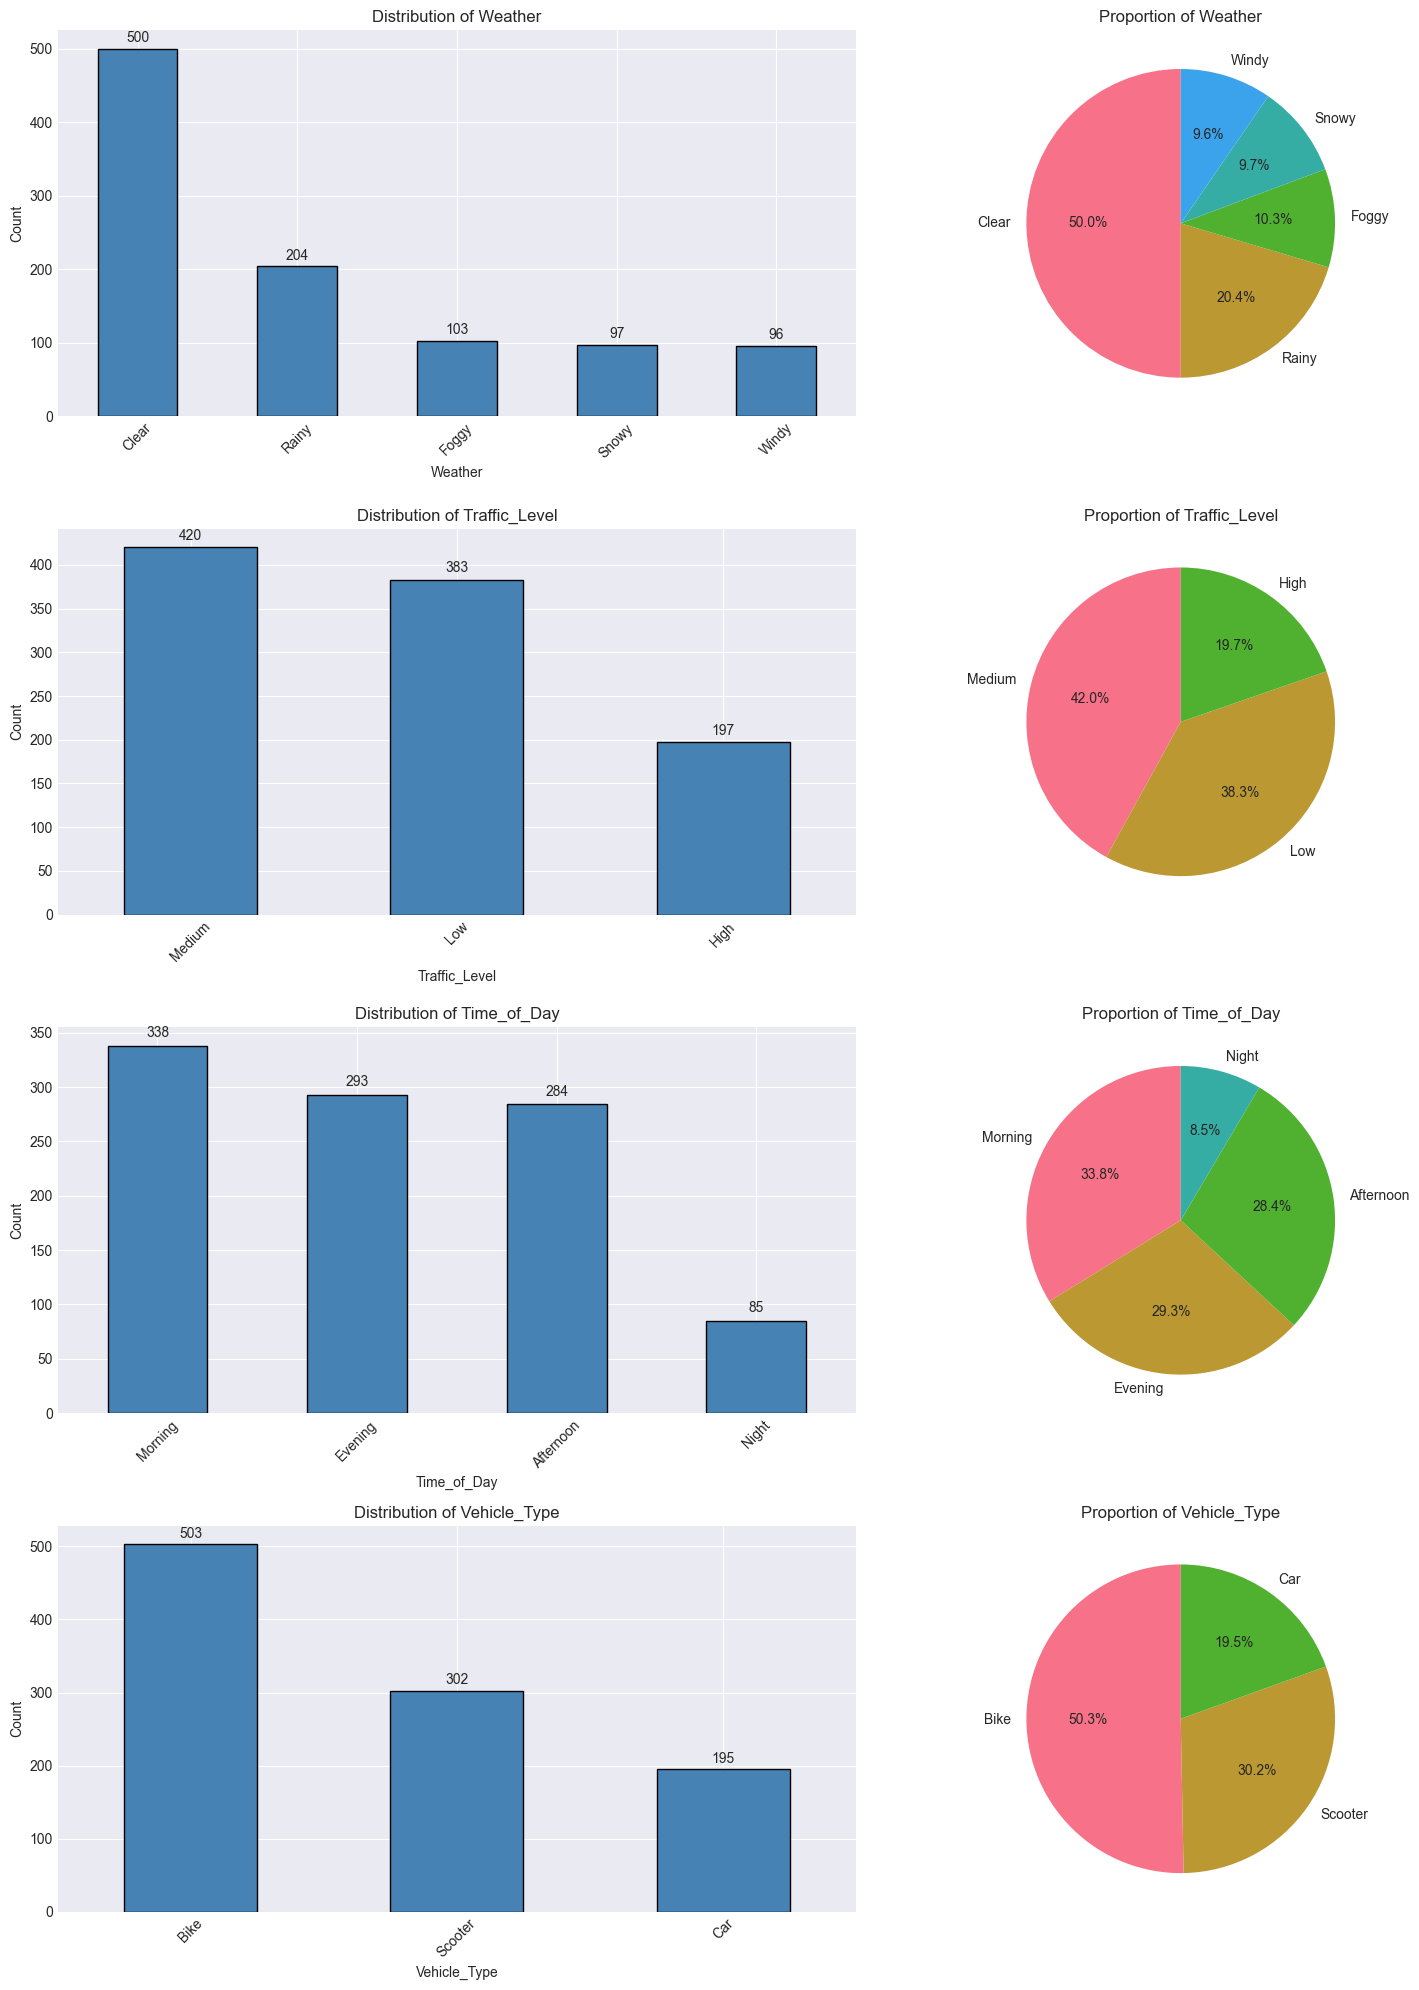

In [86]:
# Univariate analysis for categorical features
print("="*80)
print("CATEGORICAL FEATURES - UNIVARIATE ANALYSIS")
print("="*80)

cat_features = df.select_dtypes(include='object').columns.tolist()

fig, axes = plt.subplots(len(cat_features), 2, figsize=(16, 5*len(cat_features)))
if len(cat_features) == 1:
    axes = axes.reshape(1, -1)

for idx, col in enumerate(cat_features):
    # Value counts
    value_counts = df[col].value_counts()
    
    # Bar plot
    value_counts.plot(kind='bar', ax=axes[idx, 0], color='steelblue', edgecolor='black')
    axes[idx, 0].set_title(f'Distribution of {col}')
    axes[idx, 0].set_xlabel(col)
    axes[idx, 0].set_ylabel('Count')
    axes[idx, 0].tick_params(axis='x', rotation=45)
    
    # Add value labels on bars
    for i, v in enumerate(value_counts):
        axes[idx, 0].text(i, v + 5, str(v), ha='center', va='bottom')
    
    # Pie chart
    axes[idx, 1].pie(value_counts, labels=value_counts.index, autopct='%1.1f%%', startangle=90)
    axes[idx, 1].set_title(f'Proportion of {col}')
    
    # Print statistics
    print(f"\n{col}:")
    print(value_counts)
    print(f"  Unique values: {df[col].nunique()}")
    print(f"  Mode: {df[col].mode().values[0]}")
    print(f"  Most common: {value_counts.index[0]} ({value_counts.values[0]/len(df)*100:.1f}%)")

plt.tight_layout()
save_and_show(filename="categorical_features_univariate")


In [87]:
# Outlier Detection and Analysis
print("="*80)
print("OUTLIER DETECTION")
print("="*80)

def detect_outliers_iqr(data, column):
    """Detect outliers using IQR method"""
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return outliers, lower_bound, upper_bound

outlier_summary = []

for col in num_features + ['Delivery_Time_min']:
    outliers, lower, upper = detect_outliers_iqr(df, col)
    outlier_count = len(outliers)
    outlier_pct = (outlier_count / len(df)) * 100
    
    outlier_summary.append({
        'Feature': col,
        'Outlier_Count': outlier_count,
        'Outlier_Percentage': outlier_pct,
        'Lower_Bound': lower,
        'Upper_Bound': upper
    })
    
    if outlier_count > 0:
        print(f"\n{col}:")
        print(f"  Outliers: {outlier_count} ({outlier_pct:.2f}%)")
        print(f"  Bounds: [{lower:.2f}, {upper:.2f}]")
        print(f"  Outlier values range: [{outliers[col].min():.2f}, {outliers[col].max():.2f}]")

outlier_df = pd.DataFrame(outlier_summary)
print("\n" + "="*80)
print("OUTLIER SUMMARY")
print("="*80)
display(outlier_df)


OUTLIER DETECTION

Delivery_Time_min:
  Outliers: 6 (0.60%)
  Bounds: [-4.00, 116.00]
  Outlier values range: [122.00, 153.00]

OUTLIER SUMMARY


,Feature,Outlier_Count,Outlier_Percentage,Lower_Bound,Upper_Bound
0,Distance_km,0,0.00,-9.76,29.89
1,Preparation_Time_min,0,0.00,-7.00,41.00
2,Courier_Experience_yrs,0,0.00,-5.50,14.50
3,Delivery_Time_min,6,0.60,-4.00,116.00


<a id='5'></a>
## 5. Bivariate Analysis

Analyzing relationships between features and the target variable.


BIVARIATE ANALYSIS: Numerical Features vs Delivery Time

Distance_km vs Delivery_Time_min:
  Pearson Correlation: 0.7810
  Spearman Correlation: 0.8165

Preparation_Time_min vs Delivery_Time_min:
  Pearson Correlation: 0.3073
  Spearman Correlation: 0.3055

Courier_Experience_yrs vs Delivery_Time_min:
  Pearson Correlation: -0.0891
  Spearman Correlation: -0.0855
Image saved: images/numerical_vs_target_bivariate.png


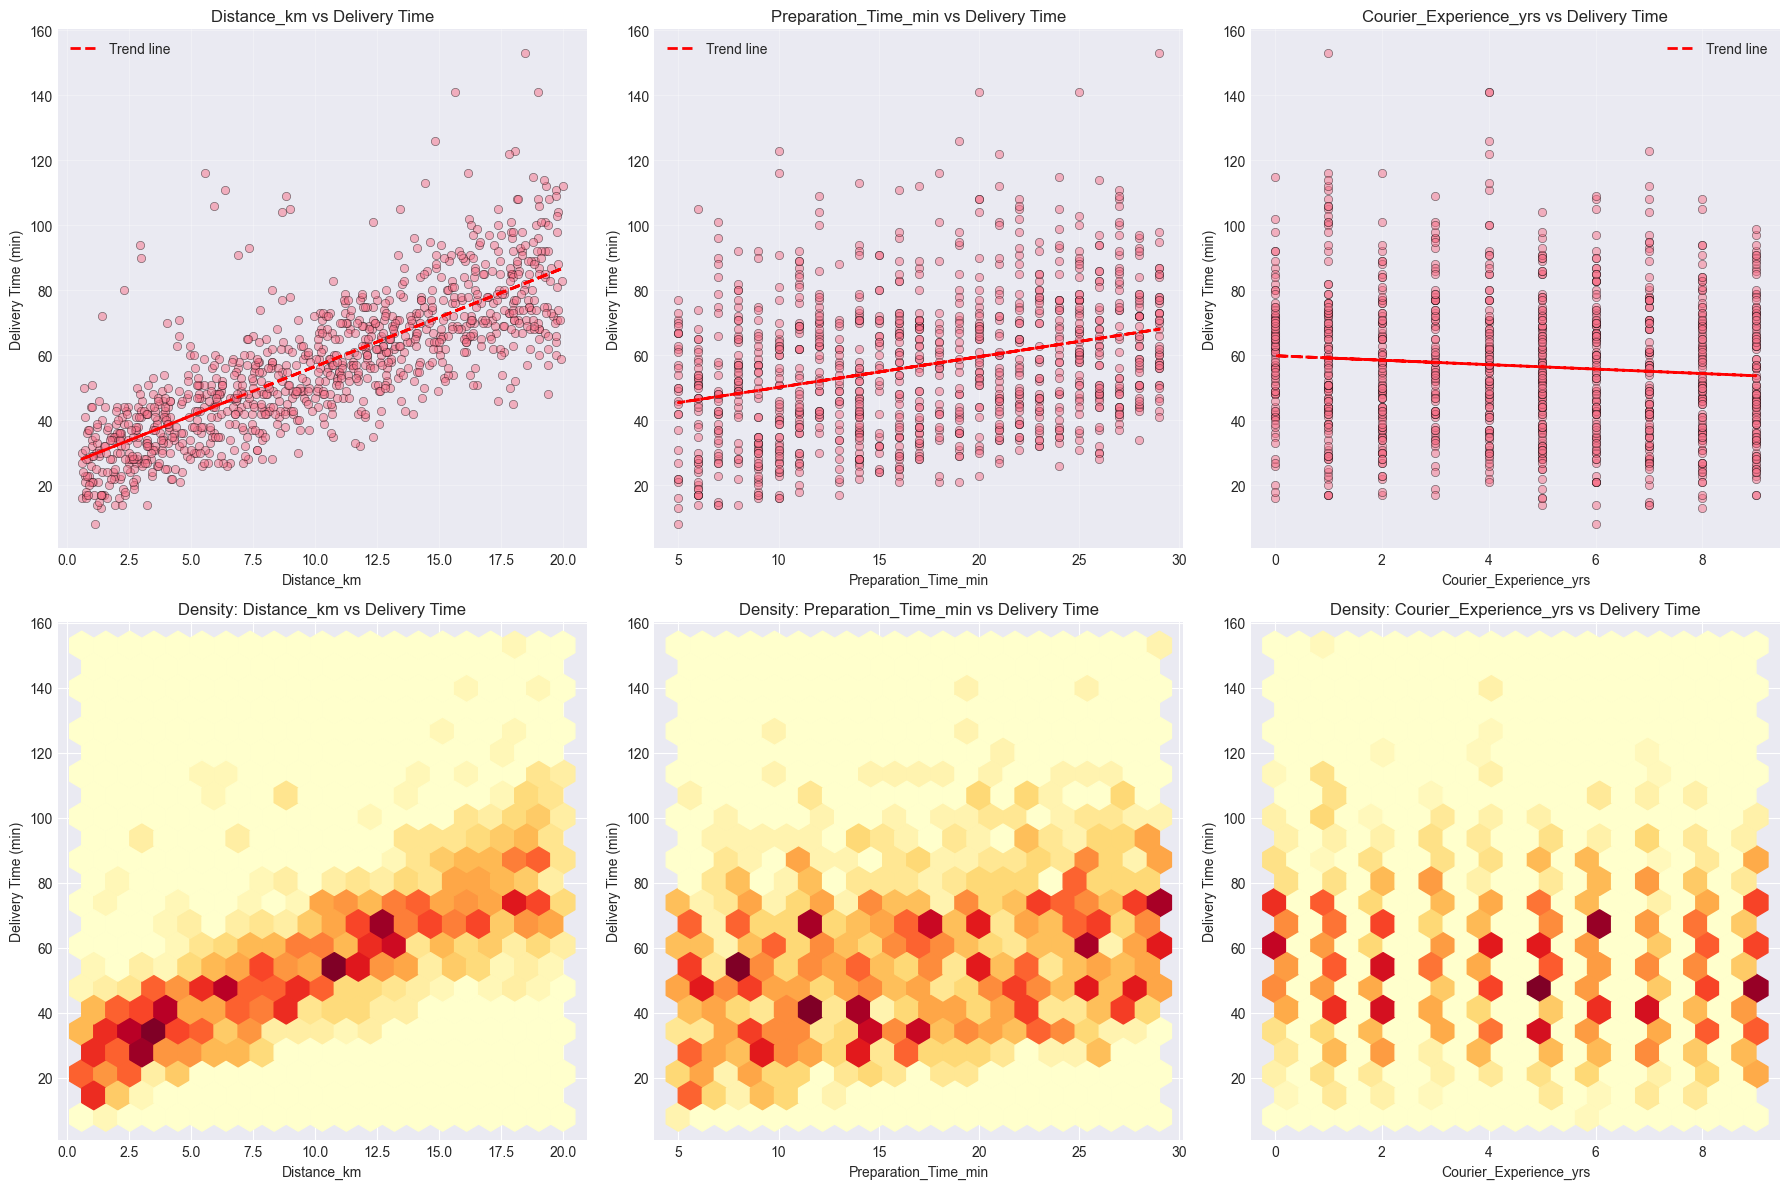

In [88]:
# Numerical features vs Target
print("="*80)
print("BIVARIATE ANALYSIS: Numerical Features vs Delivery Time")
print("="*80)

fig, axes = plt.subplots(2, len(num_features), figsize=(6*len(num_features), 12))
if len(num_features) == 1:
    axes = axes.reshape(-1, 1)

for idx, col in enumerate(num_features):
    # Scatter plot
    axes[0, idx].scatter(df[col], df['Delivery_Time_min'], alpha=0.5, edgecolors='k', linewidth=0.5)
    axes[0, idx].set_xlabel(col)
    axes[0, idx].set_ylabel('Delivery Time (min)')
    axes[0, idx].set_title(f'{col} vs Delivery Time')
    axes[0, idx].grid(alpha=0.3)
    
    # Add regression line
    z = np.polyfit(df[col], df['Delivery_Time_min'], 1)
    p = np.poly1d(z)
    axes[0, idx].plot(df[col], p(df[col]), "r--", linewidth=2, label='Trend line')
    axes[0, idx].legend()
    
    # Hexbin plot for density
    axes[1, idx].hexbin(df[col], df['Delivery_Time_min'], gridsize=20, cmap='YlOrRd')
    axes[1, idx].set_xlabel(col)
    axes[1, idx].set_ylabel('Delivery Time (min)')
    axes[1, idx].set_title(f'Density: {col} vs Delivery Time')
    
    # Calculate correlation
    corr = df[col].corr(df['Delivery_Time_min'])
    print(f"\n{col} vs Delivery_Time_min:")
    print(f"  Pearson Correlation: {corr:.4f}")
    print(f"  Spearman Correlation: {df[col].corr(df['Delivery_Time_min'], method='spearman'):.4f}")

plt.tight_layout()
save_and_show(filename="numerical_vs_target_bivariate")


BIVARIATE ANALYSIS: Categorical Features vs Delivery Time

Weather vs Delivery_Time_min:
  F-statistic: 10.4991
  p-value: 0.000000
Statistically significant relationship (p < 0.05)
  Mean Delivery Time by Weather:
    Clear: 53.15 minutes
    Foggy: 59.47 minutes
    Rainy: 59.79 minutes
    Snowy: 67.11 minutes
    Windy: 55.46 minutes

Traffic_Level vs Delivery_Time_min:
  F-statistic: 19.7513
  p-value: 0.000000
Statistically significant relationship (p < 0.05)
  Mean Delivery Time by Traffic_Level:
    High: 64.81 minutes
    Low: 52.89 minutes
    Medium: 56.45 minutes

Time_of_Day vs Delivery_Time_min:
  F-statistic: 0.3468
  p-value: 0.791508
No significant relationship (p ≥ 0.05)
  Mean Delivery Time by Time_of_Day:
    Afternoon: 56.08 minutes
    Evening: 57.48 minutes
    Morning: 57.01 minutes
    Night: 55.21 minutes

Vehicle_Type vs Delivery_Time_min:
  F-statistic: 0.5894
  p-value: 0.554867
No significant relationship (p ≥ 0.05)
  Mean Delivery Time by Vehicle_Type:
  

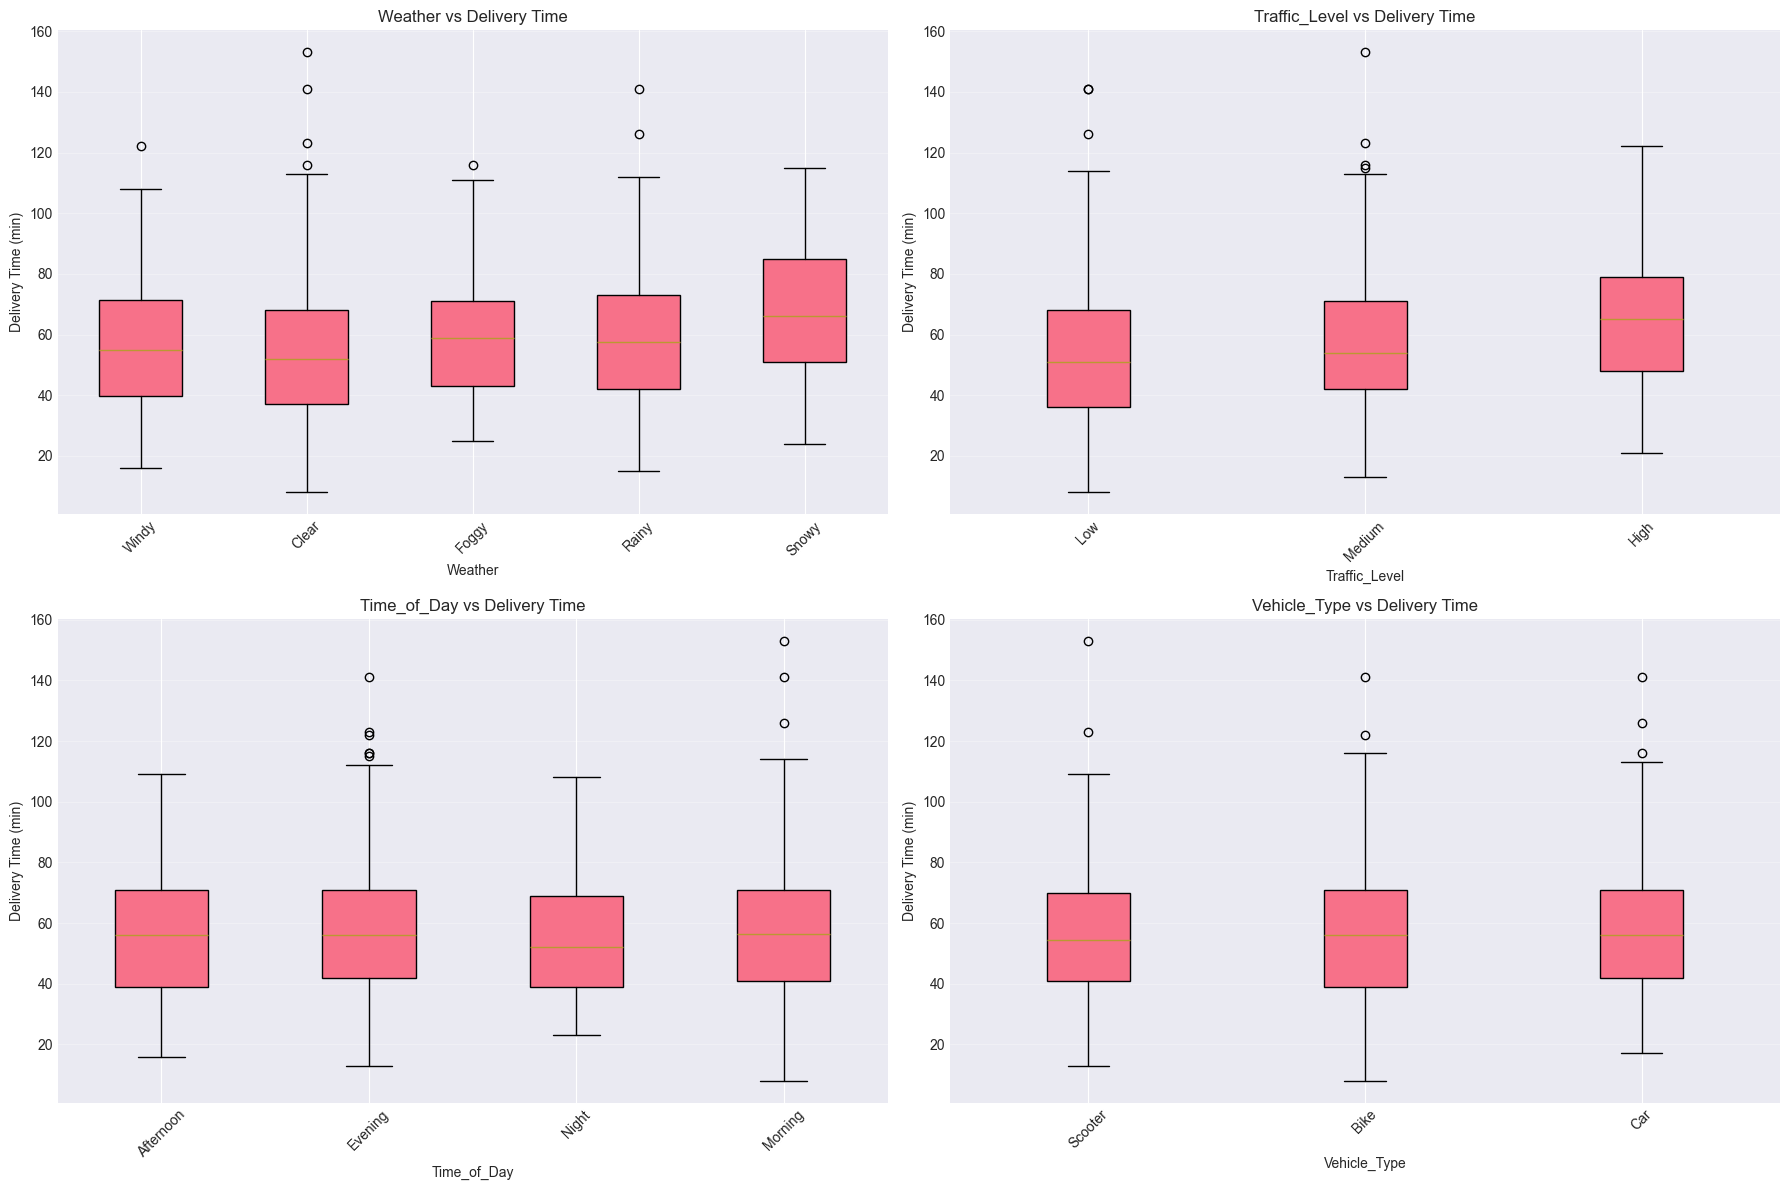

In [89]:
# Categorical features vs Target
print("="*80)
print("BIVARIATE ANALYSIS: Categorical Features vs Delivery Time")
print("="*80)

fig, axes = plt.subplots(2, 2, figsize=(18, 12))
axes = axes.ravel()

for idx, col in enumerate(cat_features):
    # Box plot
    df_plot = df.copy()
    df_plot[col] = df_plot[col].astype(str)  # Ensure it's treated as categorical
    
    box_data = [df_plot[df_plot[col] == cat]['Delivery_Time_min'].values 
                for cat in df_plot[col].unique()]
    axes[idx].boxplot(box_data, labels=df_plot[col].unique(), patch_artist=True)
    axes[idx].set_xlabel(col)
    axes[idx].set_ylabel('Delivery Time (min)')
    axes[idx].set_title(f'{col} vs Delivery Time')
    axes[idx].tick_params(axis='x', rotation=45)
    axes[idx].grid(axis='y', alpha=0.3)
    
    # Statistical test (ANOVA)
    groups = [df[df[col] == cat]['Delivery_Time_min'].values for cat in df[col].unique()]
    f_stat, p_value = stats.f_oneway(*groups)
    
    print(f"\n{col} vs Delivery_Time_min:")
    print(f"  F-statistic: {f_stat:.4f}")
    print(f"  p-value: {p_value:.6f}")
    if p_value < 0.05:
        print(f"Statistically significant relationship (p < 0.05)")
    else:
        print(f"No significant relationship (p ≥ 0.05)")
    
    # Mean delivery time by category
    print(f"  Mean Delivery Time by {col}:")
    for cat in sorted(df[col].unique()):
        mean_time = df[df[col] == cat]['Delivery_Time_min'].mean()
        print(f"    {cat}: {mean_time:.2f} minutes")

plt.tight_layout()
save_and_show(filename="categorical_vs_target_bivariate")


<a id='6'></a>
## 6. Multivariate Analysis

Examining relationships between multiple features simultaneously using correlation matrices and pairplots.


CORRELATION ANALYSIS
Image saved: images/correlation_analysis.png


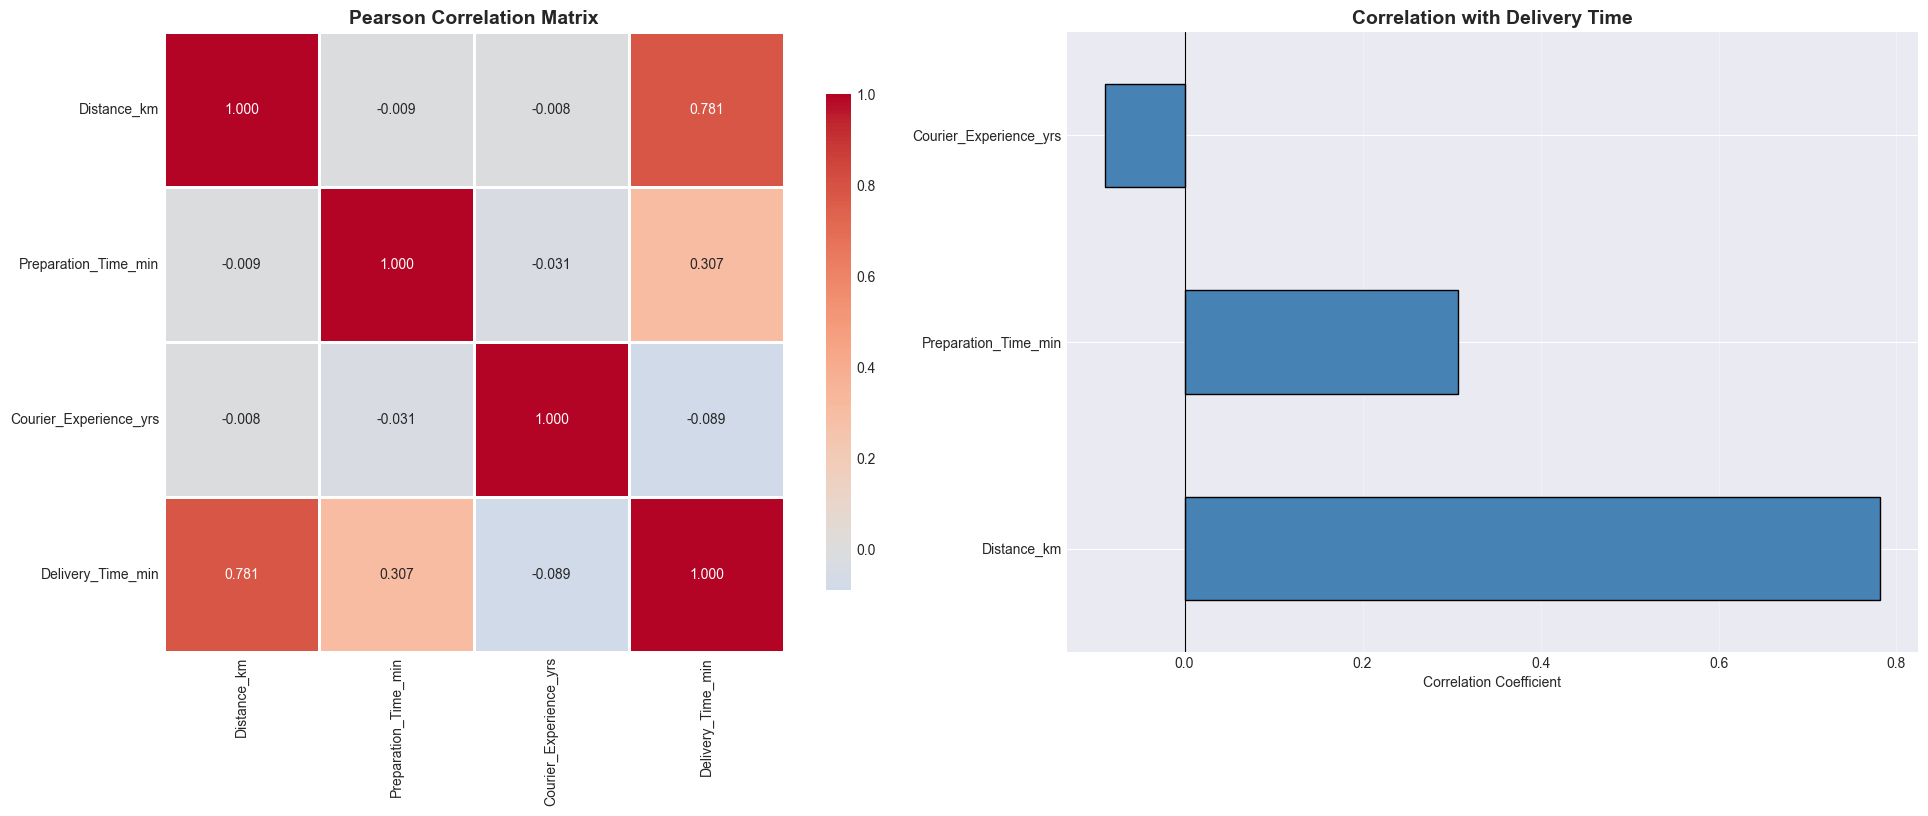


📊 CORRELATION WITH TARGET VARIABLE:
Distance_km                   :  0.7810 (Strong Positive)
Preparation_Time_min          :  0.3073 (Weak Positive)
Courier_Experience_yrs        : -0.0891 (Weak Negative)

🔍 HIGHLY CORRELATED FEATURE PAIRS (|r| > 0.7):
Distance_km <-> Delivery_Time_min: 0.7810


In [90]:
# Correlation Matrix
print("="*80)
print("CORRELATION ANALYSIS")
print("="*80)

# Select only numerical features for correlation
num_df = df[num_features + ['Delivery_Time_min']]

# Calculate correlation matrix
corr_matrix = num_df.corr()

# Create comprehensive correlation visualization
fig, axes = plt.subplots(1, 2, figsize=(20, 8))

# Heatmap with values
sns.heatmap(corr_matrix, annot=True, fmt='.3f', cmap='coolwarm', center=0,
            square=True, linewidths=1, cbar_kws={"shrink": 0.8}, ax=axes[0])
axes[0].set_title('Pearson Correlation Matrix', fontsize=14, fontweight='bold')

# Correlation with target only
target_corr = corr_matrix['Delivery_Time_min'].drop('Delivery_Time_min').sort_values(ascending=False)
target_corr.plot(kind='barh', ax=axes[1], color='steelblue', edgecolor='black')
axes[1].set_title('Correlation with Delivery Time', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Correlation Coefficient')
axes[1].grid(axis='x', alpha=0.3)
axes[1].axvline(x=0, color='black', linestyle='-', linewidth=0.8)

plt.tight_layout()
save_and_show(filename="correlation_analysis")

# Print correlation findings
print("\n📊 CORRELATION WITH TARGET VARIABLE:")
print("="*80)
for feature, corr_value in target_corr.items():
    strength = 'Strong' if abs(corr_value) > 0.7 else 'Moderate' if abs(corr_value) > 0.4 else 'Weak'
    direction = 'Positive' if corr_value > 0 else 'Negative'
    print(f"{feature:30s}: {corr_value:7.4f} ({strength} {direction})")

# Find highly correlated feature pairs
print("\n🔍 HIGHLY CORRELATED FEATURE PAIRS (|r| > 0.7):")
print("="*80)
high_corr_pairs = []
for i in range(len(corr_matrix.columns)):
    for j in range(i+1, len(corr_matrix.columns)):
        if abs(corr_matrix.iloc[i, j]) > 0.7:
            high_corr_pairs.append((corr_matrix.columns[i], corr_matrix.columns[j], corr_matrix.iloc[i, j]))

if high_corr_pairs:
    for feat1, feat2, corr_val in high_corr_pairs:
        print(f"{feat1} <-> {feat2}: {corr_val:.4f}")
else:
    print("No feature pairs with correlation > 0.7 found (Good - low multicollinearity)")


PAIRPLOT - MULTIVARIATE RELATIONSHIPS
Image saved: images/pairplot_multivariate.png


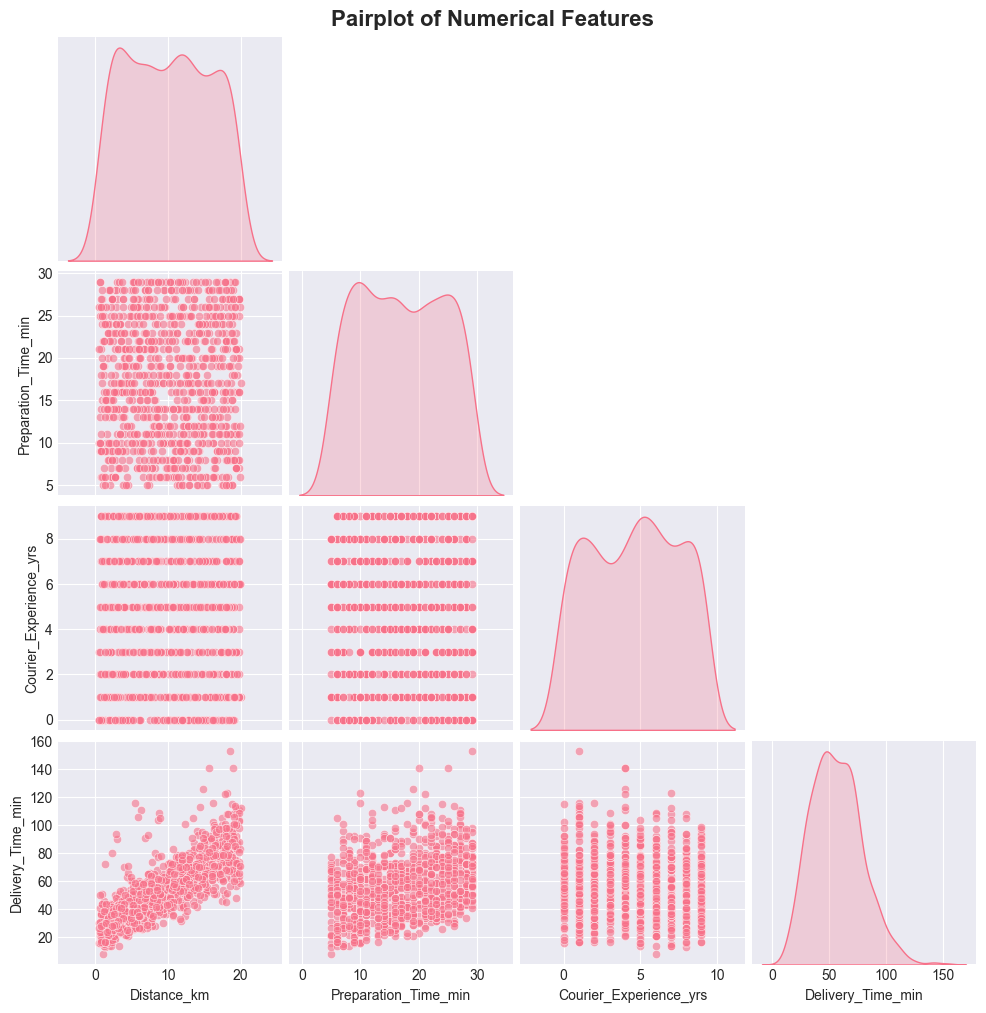

   - Diagonal: KDE plots showing distribution of each feature
   - Off-diagonal: Scatter plots showing relationships between feature pairs


In [91]:
# Pairplot for multivariate relationships
print("="*80)
print("PAIRPLOT - MULTIVARIATE RELATIONSHIPS")
print("="*80)

# Create pairplot
pairplot_fig = sns.pairplot(num_df, diag_kind='kde', plot_kws={'alpha': 0.6}, corner=True)
pairplot_fig.fig.suptitle('Pairplot of Numerical Features', y=1.01, fontsize=16, fontweight='bold')
save_and_show(fig=pairplot_fig.fig, filename="pairplot_multivariate")

print("   - Diagonal: KDE plots showing distribution of each feature")
print("   - Off-diagonal: Scatter plots showing relationships between feature pairs")


INTERACTION ANALYSIS - CATEGORICAL COMBINATIONS
Image saved: images/interaction_analysis.png


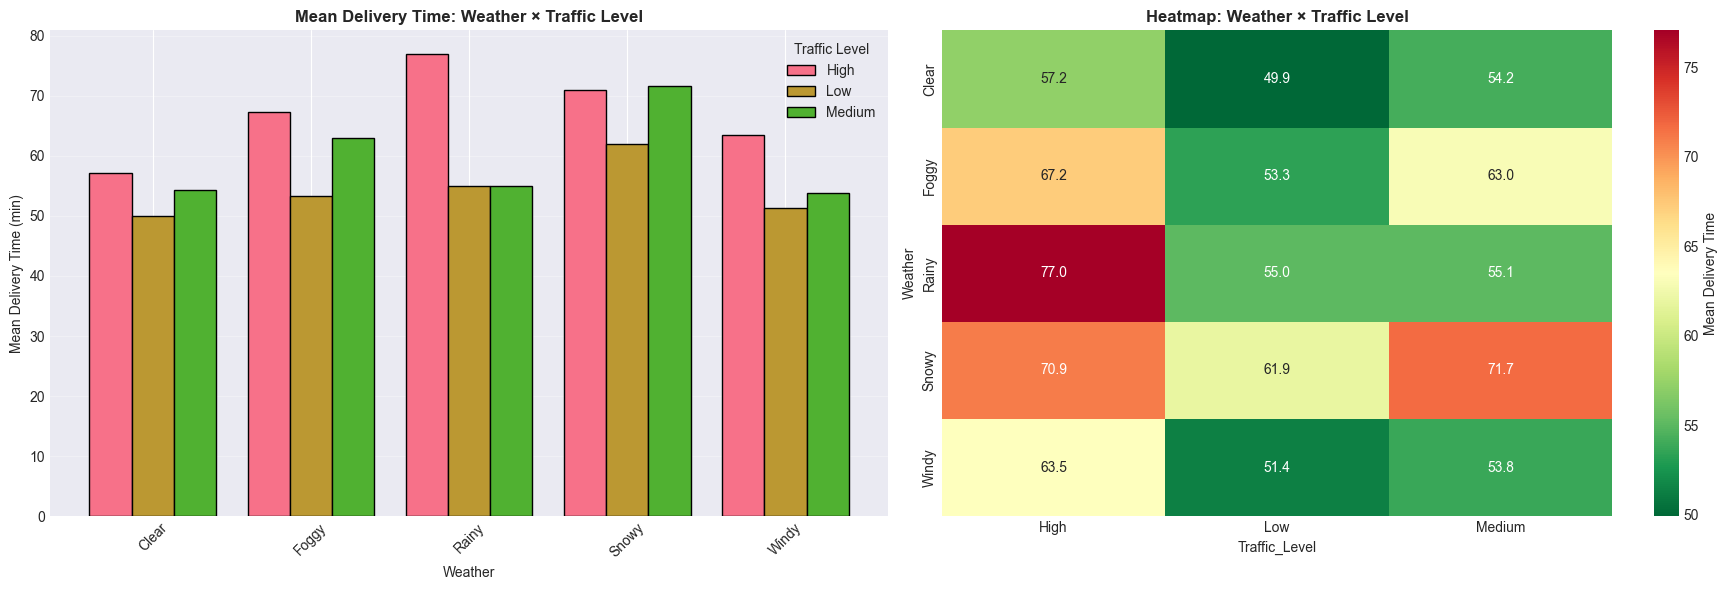


Mean Delivery Time by Weather and Traffic Level:


Traffic_Level,High,Low,Medium
Weather,,,
Clear,57.16,49.91,54.24
Foggy,67.24,53.34,63.03
Rainy,77.05,55.04,55.06
Snowy,70.90,61.93,71.73
Windy,63.48,51.38,53.79


In [92]:
# Interaction analysis - categorical combinations
print("="*80)
print("INTERACTION ANALYSIS - CATEGORICAL COMBINATIONS")
print("="*80)

# Analyze Weather + Traffic Level interaction
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

# Grouped bar plot
interaction_data = df.groupby(['Weather', 'Traffic_Level'])['Delivery_Time_min'].mean().unstack()
interaction_data.plot(kind='bar', ax=axes[0], width=0.8, edgecolor='black')
axes[0].set_title('Mean Delivery Time: Weather × Traffic Level', fontsize=12, fontweight='bold')
axes[0].set_xlabel('Weather')
axes[0].set_ylabel('Mean Delivery Time (min)')
axes[0].legend(title='Traffic Level')
axes[0].tick_params(axis='x', rotation=45)
axes[0].grid(axis='y', alpha=0.3)

# Heatmap
pivot_table = df.pivot_table(values='Delivery_Time_min', index='Weather', columns='Traffic_Level', aggfunc='mean')
sns.heatmap(pivot_table, annot=True, fmt='.1f', cmap='RdYlGn_r', ax=axes[1], cbar_kws={'label': 'Mean Delivery Time'})
axes[1].set_title('Heatmap: Weather × Traffic Level', fontsize=12, fontweight='bold')

plt.tight_layout()
save_and_show(filename="interaction_analysis")

print("\nMean Delivery Time by Weather and Traffic Level:")
display(pivot_table)


<a id='7'></a>
## 7. Dimensionality Reduction - PCA

Principal Component Analysis to understand feature variance and potential dimensionality reduction.


PRINCIPAL COMPONENT ANALYSIS (PCA)
Image saved: images/pca_analysis.png


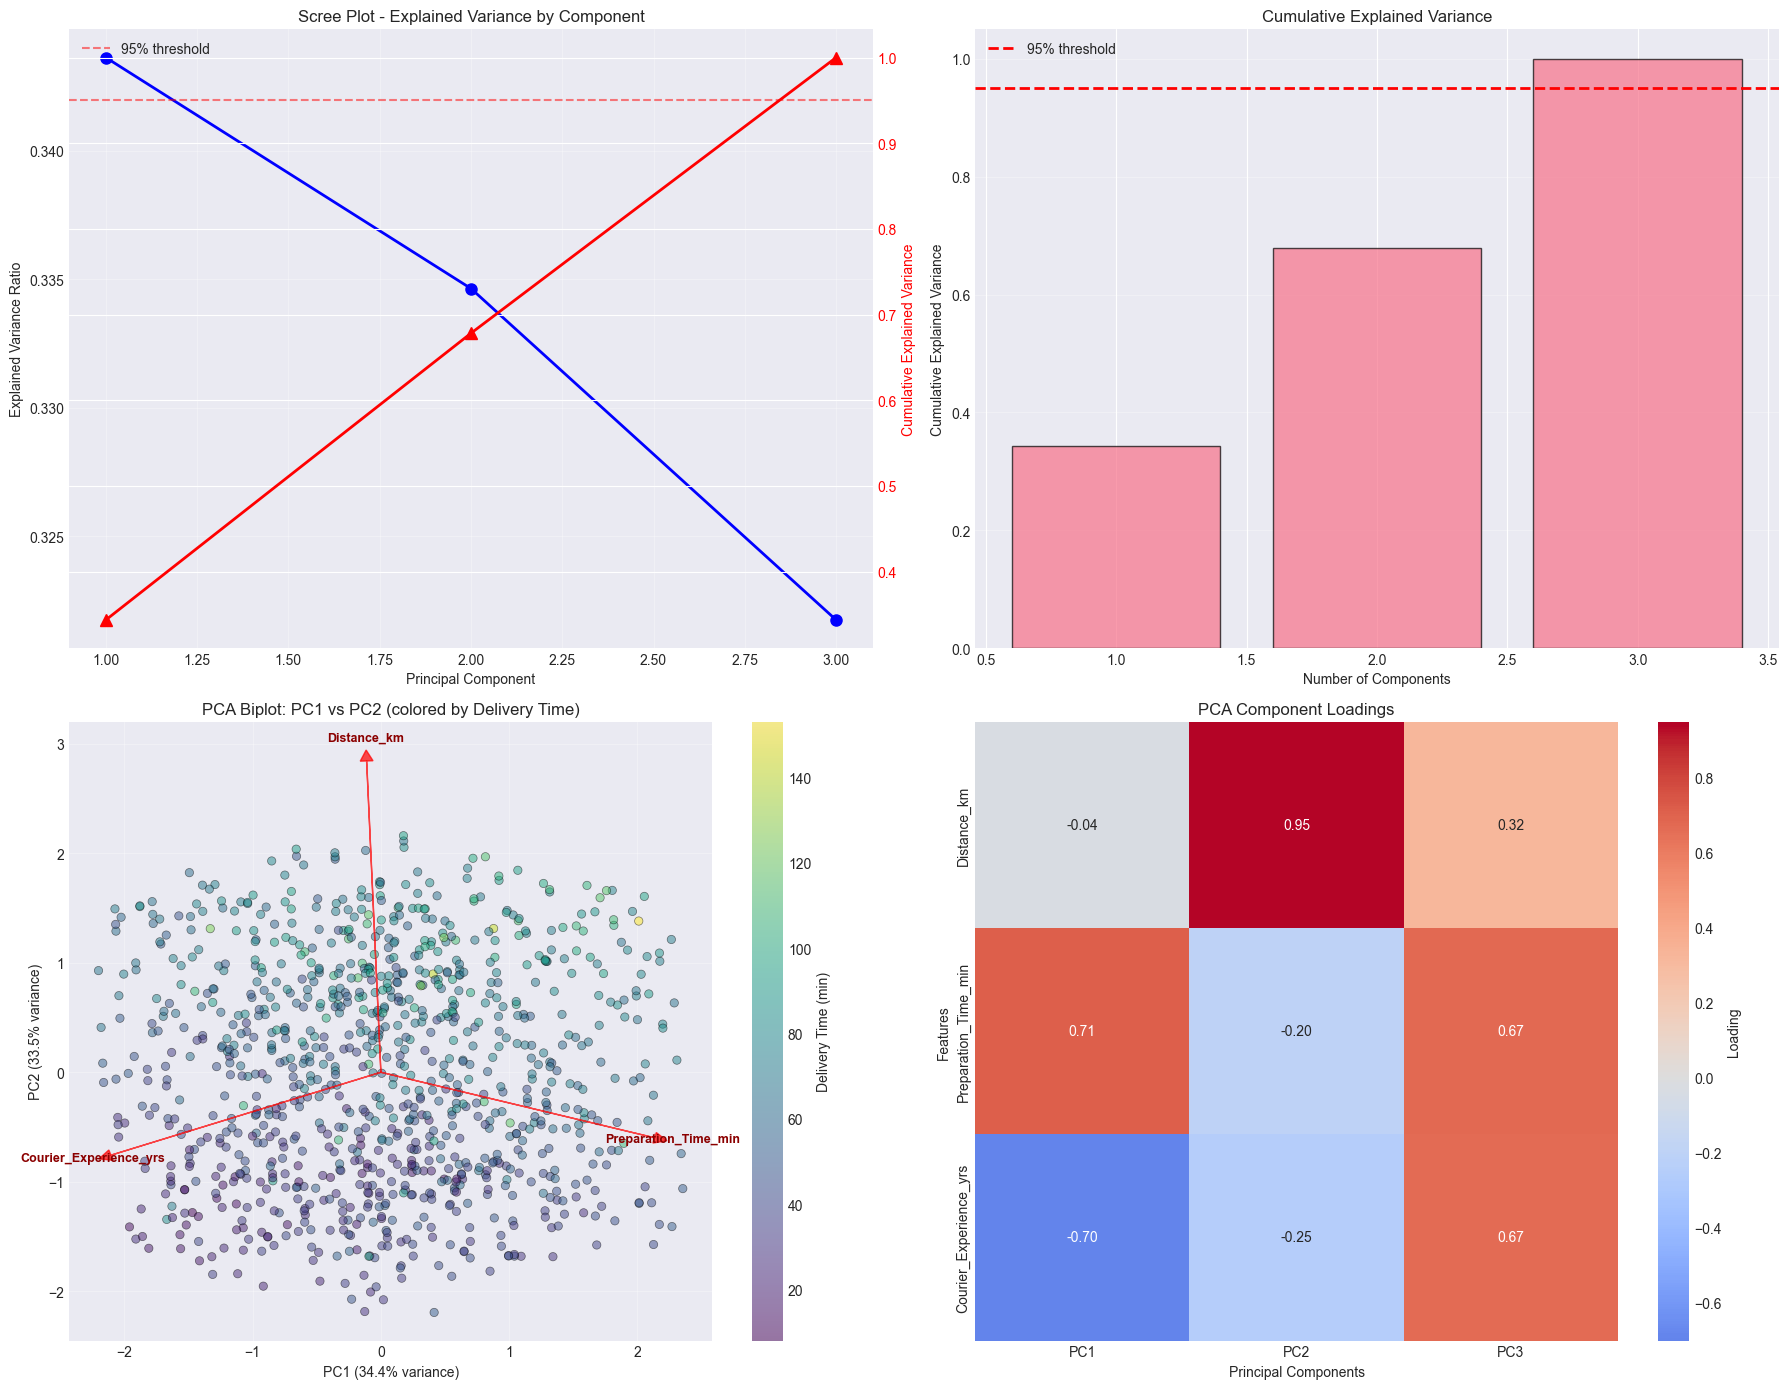


PCA SUMMARY:
Original number of features: 3

Explained Variance by Component:
  PC1: 0.3436 (34.36%) | Cumulative: 0.3436 (34.36%)
  PC2: 0.3346 (33.46%) | Cumulative: 0.6783 (67.83%)
  PC3: 0.3217 (32.17%) | Cumulative: 1.0000 (100.00%)

Components needed for 95% variance: 3

Top Component Loadings:

PC1 (explains 34.36% variance):
  Preparation_Time_min: 0.7116
  Courier_Experience_yrs: 0.7016
  Distance_km: 0.0371

PC2 (explains 33.46% variance):
  Distance_km: 0.9469
  Courier_Experience_yrs: 0.2522
  Preparation_Time_min: 0.1993

PC3 (explains 32.17% variance):
  Preparation_Time_min: 0.6737
  Courier_Experience_yrs: 0.6664
  Distance_km: 0.3193


In [93]:
# Principal Component Analysis
print("="*80)
print("PRINCIPAL COMPONENT ANALYSIS (PCA)")
print("="*80)

# Prepare data for PCA (only numerical features, excluding target and ID)
pca_features = num_features.copy()
X_pca = df[pca_features].copy()

# Standardize features before PCA
scaler = StandardScaler()
X_pca_scaled = scaler.fit_transform(X_pca)

# Perform PCA
pca = PCA()
pca_components = pca.fit_transform(X_pca_scaled)

# Create visualizations
fig, axes = plt.subplots(2, 2, figsize=(18, 14))

# 1. Scree plot - Explained Variance
axes[0, 0].plot(range(1, len(pca.explained_variance_ratio_)+1), 
                pca.explained_variance_ratio_, 'bo-', linewidth=2, markersize=8)
axes[0, 0].set_xlabel('Principal Component')
axes[0, 0].set_ylabel('Explained Variance Ratio')
axes[0, 0].set_title('Scree Plot - Explained Variance by Component')
axes[0, 0].grid(alpha=0.3)

# Add cumulative variance line
axes_twin = axes[0, 0].twinx()
axes_twin.plot(range(1, len(pca.explained_variance_ratio_)+1), 
               np.cumsum(pca.explained_variance_ratio_), 'r^-', linewidth=2, markersize=8)
axes_twin.set_ylabel('Cumulative Explained Variance', color='r')
axes_twin.tick_params(axis='y', labelcolor='r')
axes_twin.axhline(y=0.95, color='r', linestyle='--', alpha=0.5, label='95% threshold')
axes_twin.legend()

# 2. Cumulative Explained Variance
cumsum_var = np.cumsum(pca.explained_variance_ratio_)
axes[0, 1].bar(range(1, len(cumsum_var)+1), cumsum_var, alpha=0.7, edgecolor='black')
axes[0, 1].axhline(y=0.95, color='r', linestyle='--', linewidth=2, label='95% threshold')
axes[0, 1].set_xlabel('Number of Components')
axes[0, 1].set_ylabel('Cumulative Explained Variance')
axes[0, 1].set_title('Cumulative Explained Variance')
axes[0, 1].legend()
axes[0, 1].grid(axis='y', alpha=0.3)

# 3. PCA Biplot (PC1 vs PC2)
axes[1, 0].scatter(pca_components[:, 0], pca_components[:, 1], alpha=0.5, c=df['Delivery_Time_min'], 
                   cmap='viridis', edgecolors='k', linewidth=0.5)
axes[1, 0].set_xlabel(f'PC1 ({pca.explained_variance_ratio_[0]:.1%} variance)')
axes[1, 0].set_ylabel(f'PC2 ({pca.explained_variance_ratio_[1]:.1%} variance)')
axes[1, 0].set_title('PCA Biplot: PC1 vs PC2 (colored by Delivery Time)')
axes[1, 0].grid(alpha=0.3)
plt.colorbar(axes[1, 0].collections[0], ax=axes[1, 0], label='Delivery Time (min)')

# Add feature vectors
for i, feature in enumerate(pca_features):
    axes[1, 0].arrow(0, 0, pca.components_[0, i]*3, pca.components_[1, i]*3,
                     head_width=0.1, head_length=0.1, fc='red', ec='red', alpha=0.7)
    axes[1, 0].text(pca.components_[0, i]*3.2, pca.components_[1, i]*3.2, feature, 
                    fontsize=9, ha='center', color='darkred', fontweight='bold')

# 4. Component Loadings Heatmap
loadings = pd.DataFrame(
    pca.components_.T,
    columns=[f'PC{i+1}' for i in range(len(pca_features))],
    index=pca_features
)
sns.heatmap(loadings, annot=True, fmt='.2f', cmap='coolwarm', center=0, ax=axes[1, 1], 
            cbar_kws={'label': 'Loading'})
axes[1, 1].set_title('PCA Component Loadings')
axes[1, 1].set_xlabel('Principal Components')
axes[1, 1].set_ylabel('Features')

plt.tight_layout()
save_and_show(filename="pca_analysis")

# Print PCA summary
print(f"\nPCA SUMMARY:")
print("="*80)
print(f"Original number of features: {len(pca_features)}")
print(f"\nExplained Variance by Component:")
for i, (var, cum_var) in enumerate(zip(pca.explained_variance_ratio_, cumsum_var)):
    print(f"  PC{i+1}: {var:.4f} ({var*100:.2f}%) | Cumulative: {cum_var:.4f} ({cum_var*100:.2f}%)")

n_components_95 = np.argmax(cumsum_var >= 0.95) + 1
print(f"\nComponents needed for 95% variance: {n_components_95}")

print(f"\nTop Component Loadings:")
print("="*80)
for i in range(min(3, len(pca_features))):
    print(f"\nPC{i+1} (explains {pca.explained_variance_ratio_[i]*100:.2f}% variance):")
    component_loadings = pd.Series(pca.components_[i], index=pca_features).abs().sort_values(ascending=False)
    for feat, loading in component_loadings.items():
        print(f"  {feat}: {loading:.4f}")


<a id='8'></a>
## 8. Professional Data Science Report

Comprehensive summary of findings as a professional data scientist would report to stakeholders.


In [94]:
# Professional Data Science Report
print("="*80)
print("PROFESSIONAL DATA SCIENCE REPORT")
print("="*80)
print("\nEXECUTIVE SUMMARY")
print("="*80)
print(f"""
This analysis examines {len(df)} food delivery orders to identify patterns and 
relationships affecting delivery time. The dataset contains {len(df.columns)} features
including {len(num_features)} numerical and {len(cat_features)} categorical variables.
""")

print("\nCORRELATED PAIRS & REDUNDANT COLUMNS")
print("="*80)

# Check for redundant features
if high_corr_pairs:
    print("HIGHLY CORRELATED FEATURE PAIRS (|r| > 0.7):")
    for feat1, feat2, corr_val in high_corr_pairs:
        print(f"  • {feat1} <-> {feat2}: r = {corr_val:.4f}")
        print(f"    → Consider removing one feature to reduce multicollinearity")
else:
    print("NO REDUNDANT FEATURES DETECTED")
    print("  • No feature pairs with |correlation| > 0.7")
    print("  • Low multicollinearity - all features provide unique information")

# Check variance
print("\n  Feature Variance Analysis:")
for feat in pca_features:
    variance = df[feat].var()
    cv = (df[feat].std() / df[feat].mean()) * 100 if df[feat].mean() != 0 else 0
    print(f"  • {feat}: Variance = {variance:.2f}, CV = {cv:.2f}%")

print("\nFEATURES STRONGLY RELATED TO TARGET VARIABLE")
print("="*80)

# Get correlations with target
target_correlations = corr_matrix['Delivery_Time_min'].drop('Delivery_Time_min').sort_values(ascending=False)

print("Numerical Features:")
for feat, corr_val in target_correlations.items():
    strength = 'Strong' if abs(corr_val) > 0.7 else 'Moderate' if abs(corr_val) > 0.4 else 'Weak'
    print(f"  • {feat:30s}: r = {corr_val:7.4f} [{strength}]")

print("\nCategorical Features (ANOVA results):")
for col in cat_features:
    groups = [df[df[col] == cat]['Delivery_Time_min'].values for cat in df[col].unique()]
    f_stat, p_value = stats.f_oneway(*groups)
    significance = 'Significant' if p_value < 0.05 else 'Not Significant'
    print(f"  • {col:30s}: F = {f_stat:8.2f}, p = {p_value:.6f} [{significance}]")

print("\nQUALITY AND DISTRIBUTION OF CATEGORICAL LEVELS")
print("="*80)

for col in cat_features:
    value_counts = df[col].value_counts()
    n_categories = df[col].nunique()
    
    print(f"\n{col}:")
    print(f"  • Number of categories: {n_categories}")
    print(f"  • Distribution balance:")
    
    for category, count in value_counts.items():
        percentage = (count / len(df)) * 100
        balance = '⚖️ Balanced' if percentage > 15 else '⚠️ Imbalanced' if percentage > 5 else '🔴 Rare'
        print(f"    - {category}: {count} ({percentage:.1f}%) [{balance}]")
    
    # Check for rare categories
    rare_categories = value_counts[value_counts < len(df) * 0.05]
    if len(rare_categories) > 0:
        print(f"  • Rare categories (< 5%): {list(rare_categories.index)}")
    else:
        print(f"  • No rare categories detected")

print("\n4️⃣ PRESENCE OF OUTLIERS AND SKEWED DATA")
print("="*80)

for col in num_features + ['Delivery_Time_min']:
    outliers, lower, upper = detect_outliers_iqr(df, col)
    skewness = df[col].skew()
    
    print(f"\n{col}:")
    print(f"  • Outliers: {len(outliers)} ({len(outliers)/len(df)*100:.2f}%)")
    if len(outliers) > 0:
        print(f"    - IQR bounds: [{lower:.2f}, {upper:.2f}]")
        print(f"    - Outlier range: [{outliers[col].min():.2f}, {outliers[col].max():.2f}]")
    
    print(f"  • Skewness: {skewness:.4f}", end='')
    if abs(skewness) < 0.5:
        print(" [Approximately symmetric]")
    elif abs(skewness) < 1.0:
        print(f" [Moderately skewed - {'right' if skewness > 0 else 'left'}]")
    else:
        print(f" [Highly skewed - {'right' if skewness > 0 else 'left'}]")

print("\nREQUIRED TRANSFORMATIONS")
print("="*80)

transformations_needed = []

for col in num_features + ['Delivery_Time_min']:
    skewness = df[col].skew()
    
    # Check if transformation needed
    if abs(skewness) > 0.75:
        if skewness > 0:
            transformations_needed.append({
                'Feature': col,
                'Issue': 'Right-skewed',
                'Skewness': skewness,
                'Recommended_Transform': 'Log transformation (log1p)',
                'Reason': 'Reduce right skewness and normalize distribution'
            })
        else:
            transformations_needed.append({
                'Feature': col,
                'Issue': 'Left-skewed',
                'Skewness': skewness,
                'Recommended_Transform': 'Square or exponential transformation',
                'Reason': 'Reduce left skewness'
            })

if transformations_needed:
    transform_df = pd.DataFrame(transformations_needed)
    display(transform_df)
    print(f"\n{len(transformations_needed)} features require transformation")
else:
    print("NO TRANSFORMATIONS REQUIRED")
    print("  • All features have acceptable skewness (|skew| < 0.75)")

print("\n" + "="*80)
print("REPORT COMPLETE")
print("="*80)


PROFESSIONAL DATA SCIENCE REPORT

EXECUTIVE SUMMARY

This analysis examines 1000 food delivery orders to identify patterns and 
relationships affecting delivery time. The dataset contains 9 features
including 3 numerical and 4 categorical variables.


CORRELATED PAIRS & REDUNDANT COLUMNS
HIGHLY CORRELATED FEATURE PAIRS (|r| > 0.7):
  • Distance_km <-> Delivery_Time_min: r = 0.7810
    → Consider removing one feature to reduce multicollinearity

  Feature Variance Analysis:
  • Distance_km: Variance = 32.45, CV = 56.63%
  • Preparation_Time_min: Variance = 51.91, CV = 42.42%
  • Courier_Experience_yrs: Variance = 8.24, CV = 62.53%

FEATURES STRONGLY RELATED TO TARGET VARIABLE
Numerical Features:
  • Distance_km                   : r =  0.7810 [Strong]
  • Preparation_Time_min          : r =  0.3073 [Weak]
  • Courier_Experience_yrs        : r = -0.0891 [Weak]

Categorical Features (ANOVA results):
  • Weather                       : F =    10.50, p = 0.000000 [Significant]
  • Traffic_L

<a id='9'></a>
## 9. Feature Engineering

Creating new features and transforming existing ones based on EDA insights.


In [95]:
# Feature Engineering
print("="*80)
print("FEATURE ENGINEERING")
print("="*80)

# Create a copy for feature engineering
df_engineered = df.copy()

print("\n1. Creating Domain-Based Features:")
print("-"*80)

# 1. Estimated Speed based on Vehicle Type (domain knowledge)
vehicle_speeds = {'Bike': 15, 'Scooter': 25, 'Car': 30}  # km/h average city speeds
df_engineered['Estimated_Speed_kmh'] = df_engineered['Vehicle_Type'].map(vehicle_speeds)
print(f"Estimated_Speed_kmh: Based on vehicle type speeds")

# 2. Time per km (speed factor)
df_engineered['Time_per_km'] = 60 / df_engineered['Estimated_Speed_kmh']
print(f"Time_per_km: Minutes needed to travel 1 km")

# 3. Estimated Travel Time
df_engineered['Estimated_Travel_Time'] = df_engineered['Distance_km'] * df_engineered['Time_per_km']
print(f"Estimated_Travel_Time: Distance × Time_per_km")

# 4. Total Estimated Time
df_engineered['Total_Time_Estimate'] = df_engineered['Preparation_Time_min'] + df_engineered['Estimated_Travel_Time']
print(f"Total_Time_Estimate: Preparation + Travel time")

# 5. Rush Hour Indicator
df_engineered['Is_Rush_Hour'] = ((df_engineered['Time_of_Day'] == 'Evening') | 
                                   (df_engineered['Time_of_Day'] == 'Morning')).astype(int)
print(f"Is_Rush_Hour: Binary indicator for morning/evening")

# 6. Bad Weather Indicator
bad_weather = ['Rainy', 'Snowy', 'Foggy']
df_engineered['Is_Bad_Weather'] = df_engineered['Weather'].isin(bad_weather).astype(int)
print(f"Is_Bad_Weather: Binary indicator for adverse weather")

# 7. High Traffic Indicator
df_engineered['Is_High_Traffic'] = (df_engineered['Traffic_Level'] == 'High').astype(int)
print(f"Is_High_Traffic: Binary indicator for high traffic")

# 8. Experience Level Categories
df_engineered['Experience_Level'] = pd.cut(df_engineered['Courier_Experience_yrs'],
                                           bins=[-np.inf, 2, 5, np.inf],
                                           labels=['Novice', 'Intermediate', 'Expert'])
print(f"Experience_Level: Categorized courier experience")

# 9. Distance Categories
df_engineered['Distance_Category'] = pd.cut(df_engineered['Distance_km'],
                                            bins=[0, 5, 10, 15, np.inf],
                                            labels=['Very_Short', 'Short', 'Medium', 'Long'])
print(f"Distance_Category: Categorized distance ranges")

# 10. Interaction Features
df_engineered['Weather_Traffic'] = df_engineered['Weather'] + '_' + df_engineered['Traffic_Level']
print(f"Weather_Traffic: Interaction between weather and traffic")

df_engineered['Vehicle_Traffic'] = df_engineered['Vehicle_Type'] + '_' + df_engineered['Traffic_Level']
print(f"Vehicle_Traffic: Interaction between vehicle and traffic")

print(f"\nDataset shape after feature engineering: {df_engineered.shape}")
print(f"   New features created: {df_engineered.shape[1] - df.shape[1]}")


FEATURE ENGINEERING

1. Creating Domain-Based Features:
--------------------------------------------------------------------------------
Estimated_Speed_kmh: Based on vehicle type speeds
Time_per_km: Minutes needed to travel 1 km
Estimated_Travel_Time: Distance × Time_per_km
Total_Time_Estimate: Preparation + Travel time
Is_Rush_Hour: Binary indicator for morning/evening
Is_Bad_Weather: Binary indicator for adverse weather
Is_High_Traffic: Binary indicator for high traffic
Experience_Level: Categorized courier experience
Distance_Category: Categorized distance ranges
Weather_Traffic: Interaction between weather and traffic
Vehicle_Traffic: Interaction between vehicle and traffic

Dataset shape after feature engineering: (1000, 20)
   New features created: 11


In [96]:
# Apply transformations for skewed features
print("\n2. Applying Transformations:")
print("-"*80)

transformations_applied = []

for col in num_features:
    original_skew = df_engineered[col].skew()
    
    # Apply log transformation for right-skewed data
    if original_skew > 0.75:
        df_engineered[f'{col}_log'] = np.log1p(df_engineered[col])
        new_skew = df_engineered[f'{col}_log'].skew()
        transformations_applied.append({
            'Feature': col,
            'Transformation': 'log1p',
            'Original_Skew': original_skew,
            'New_Skew': new_skew,
            'Improvement': abs(original_skew) - abs(new_skew)
        })
        print(f"{col}_log: Log transformation applied (skew: {original_skew:.4f} → {new_skew:.4f})")
    
    # Apply square root transformation for moderately skewed data
    elif 0.5 < original_skew <= 0.75:
        df_engineered[f'{col}_sqrt'] = np.sqrt(df_engineered[col])
        new_skew = df_engineered[f'{col}_sqrt'].skew()
        transformations_applied.append({
            'Feature': col,
            'Transformation': 'sqrt',
            'Original_Skew': original_skew,
            'New_Skew': new_skew,
            'Improvement': abs(original_skew) - abs(new_skew)
        })
        print(f"{col}_sqrt: Square root transformation applied (skew: {original_skew:.4f} → {new_skew:.4f})")

if transformations_applied:
    transform_summary = pd.DataFrame(transformations_applied)
    print(f"\nTransformation Summary:")
    display(transform_summary)
else:
    print("No transformations needed - features are reasonably symmetric")

print(f"\nFinal engineered dataset shape: {df_engineered.shape}")
display(df_engineered.head())



2. Applying Transformations:
--------------------------------------------------------------------------------
No transformations needed - features are reasonably symmetric

Final engineered dataset shape: (1000, 20)


,Order_ID,Distance_km,Weather,Traffic_Level,Time_of_Day,Vehicle_Type,Preparation_Time_min,Courier_Experience_yrs,Delivery_Time_min,Estimated_Speed_kmh,Time_per_km,Estimated_Travel_Time,Total_Time_Estimate,Is_Rush_Hour,Is_Bad_Weather,Is_High_Traffic,Experience_Level,Distance_Category,Weather_Traffic,Vehicle_Traffic
0,522,7.93,Windy,Low,Afternoon,Scooter,12,1.00,43,25,2.40,19.03,31.03,0,0,0,Novice,Short,Windy_Low,Scooter_Low
1,738,16.42,Clear,Medium,Evening,Bike,20,2.00,84,15,4.00,65.68,85.68,1,0,0,Novice,Long,Clear_Medium,Bike_Medium
2,741,9.52,Foggy,Low,Night,Scooter,28,1.00,59,25,2.40,22.85,50.85,0,1,0,Novice,Short,Foggy_Low,Scooter_Low
3,661,7.44,Rainy,Medium,Afternoon,Scooter,5,1.00,37,25,2.40,17.86,22.86,0,1,0,Novice,Short,Rainy_Medium,Scooter_Medium
4,412,19.03,Clear,Low,Morning,Bike,16,5.00,68,15,4.00,76.12,92.12,1,0,0,Intermediate,Long,Clear_Low,Bike_Low


<a id='10'></a>
## 10. Model Building & Benchmarking

Training multiple models and comparing performance to find the best predictor of delivery time.


In [97]:
# Prepare data for modeling
print("="*80)
print("DATA PREPARATION FOR MODELING")
print("="*80)

# Separate features and target
X = df_engineered.drop(['Delivery_Time_min', 'Order_ID'], axis=1, errors='ignore')
y = df_engineered['Delivery_Time_min']

print(f"Features shape: {X.shape}")
print(f"Target shape: {y.shape}")
print(f"\nFeatures before encoding:")
print(X.dtypes)

# Encode categorical variables
print("\n" + "="*80)
print("ENCODING CATEGORICAL VARIABLES")
print("="*80)

# Get categorical columns
cat_cols_to_encode = X.select_dtypes(include=['object', 'category']).columns.tolist()
print(f"Categorical columns to encode: {cat_cols_to_encode}")

# One-hot encoding
X_encoded = pd.get_dummies(X, columns=cat_cols_to_encode, drop_first=True)

print(f"\nEncoding complete")
print(f"   Features before encoding: {X.shape[1]}")
print(f"   Features after encoding: {X_encoded.shape[1]}")
print(f"   New features created: {X_encoded.shape[1] - X.shape[1]}")

# Split data
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

print(f"\nData Split:")
print(f"   Training set: {X_train.shape[0]} samples ({X_train.shape[0]/len(X_encoded)*100:.1f}%)")
print(f"   Test set: {X_test.shape[0]} samples ({X_test.shape[0]/len(X_encoded)*100:.1f}%)")

# Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(f"\nFeatures standardized (mean=0, std=1)")


DATA PREPARATION FOR MODELING
Features shape: (1000, 18)
Target shape: (1000,)

Features before encoding:
Distance_km                float64
Weather                     object
Traffic_Level               object
Time_of_Day                 object
Vehicle_Type                object
Preparation_Time_min         int64
Courier_Experience_yrs     float64
Estimated_Speed_kmh          int64
Time_per_km                float64
Estimated_Travel_Time      float64
Total_Time_Estimate        float64
Is_Rush_Hour                 int64
Is_Bad_Weather               int64
Is_High_Traffic              int64
Experience_Level          category
Distance_Category         category
Weather_Traffic             object
Vehicle_Traffic             object
dtype: object

ENCODING CATEGORICAL VARIABLES
Categorical columns to encode: ['Weather', 'Traffic_Level', 'Time_of_Day', 'Vehicle_Type', 'Experience_Level', 'Distance_Category', 'Weather_Traffic', 'Vehicle_Traffic']

Encoding complete
   Features before encoding: 

In [98]:
# Define evaluation function
def evaluate_model(y_true, y_pred, model_name):
    """Calculate regression metrics"""
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    mape = mean_absolute_percentage_error(y_true, y_pred) * 100
    
    return {
        'Model': model_name,
        'RMSE': rmse,
        'MAE': mae,
        'R²': r2,
        'MAPE (%)': mape,
        'MSE': mse
    }

print("Evaluation function defined")


Evaluation function defined


In [99]:
# Initialize models
print("="*80)
print("INITIALIZING MODELS")
print("="*80)

models = {
    # Linear Models
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(alpha=1.0, random_state=42),
    'Lasso Regression': Lasso(alpha=1.0, random_state=42),
    'ElasticNet': ElasticNet(alpha=1.0, l1_ratio=0.5, random_state=42),
    
    # Tree-Based Models
    'Decision Tree': DecisionTreeRegressor(max_depth=10, random_state=42),
    'Random Forest': RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42, n_jobs=-1),
    'Gradient Boosting': GradientBoostingRegressor(n_estimators=100, max_depth=5, random_state=42),
    'AdaBoost': AdaBoostRegressor(n_estimators=100, random_state=42),
    'XGBoost': XGBRegressor(n_estimators=100, max_depth=5, random_state=42, n_jobs=-1),
    'LightGBM': LGBMRegressor(n_estimators=100, max_depth=5, random_state=42, n_jobs=-1, verbose=-1),
    
    # Other Models
    'K-Nearest Neighbors': KNeighborsRegressor(n_neighbors=5),
    'Support Vector Regression': SVR(kernel='rbf', C=1.0)
}

print(f"{len(models)} models initialized:")
for i, model_name in enumerate(models.keys(), 1):
    print(f"   {i:2d}. {model_name}")


INITIALIZING MODELS
12 models initialized:
    1. Linear Regression
    2. Ridge Regression
    3. Lasso Regression
    4. ElasticNet
    5. Decision Tree
    6. Random Forest
    7. Gradient Boosting
    8. AdaBoost
    9. XGBoost
   10. LightGBM
   11. K-Nearest Neighbors
   12. Support Vector Regression


In [100]:
# Train and evaluate all models
print("="*80)
print("TRAINING AND EVALUATING MODELS")
print("="*80)

results = []
trained_models = {}

for model_name, model in models.items():
    print(f"\nTraining {model_name}...", end=' ')
    
    try:
        # Train model
        model.fit(X_train_scaled, y_train)
        
        # Make predictions
        y_train_pred = model.predict(X_train_scaled)
        y_test_pred = model.predict(X_test_scaled)
        
        # Evaluate
        train_results = evaluate_model(y_train, y_train_pred, f"{model_name} (Train)")
        test_results = evaluate_model(y_test, y_test_pred, f"{model_name} (Test)")
        
        results.append(train_results)
        results.append(test_results)
        
        # Store trained model
        trained_models[model_name] = {
            'model': model,
            'train_score': train_results['R²'],
            'test_score': test_results['R²']
        }
        
        print(f"Done Test R² = {test_results['R²']:.4f}")
        
    except Exception as e:
        print(f"Failed: {str(e)}")

# Create results dataframe
results_df = pd.DataFrame(results)
print("\n" + "="*80)
print("MODEL PERFORMANCE SUMMARY")
print("="*80)
display(results_df)


TRAINING AND EVALUATING MODELS

Training Linear Regression... Done Test R² = 0.8193

Training Ridge Regression... Done Test R² = 0.8199

Training Lasso Regression... Done Test R² = 0.8032

Training ElasticNet... Done Test R² = 0.7749

Training Decision Tree... Done Test R² = 0.5744

Training Random Forest... Done Test R² = 0.7855

Training Gradient Boosting... Done Test R² = 0.7672

Training AdaBoost... Done Test R² = 0.4381

Training XGBoost... Done Test R² = 0.7330

Training LightGBM... Done Test R² = 0.7900

Training K-Nearest Neighbors... Done Test R² = 0.6034

Training Support Vector Regression... Done Test R² = 0.6161

MODEL PERFORMANCE SUMMARY


,Model,RMSE,MAE,R²,MAPE (%),MSE
0,Linear Regression (Train),10.73,6.56,0.77,10.91,115.04
1,Linear Regression (Test),9.00,6.06,0.82,10.83,80.99
2,Ridge Regression (Train),10.73,6.56,0.77,10.89,115.06
3,Ridge Regression (Test),8.98,6.04,0.82,10.77,80.71
4,Lasso Regression (Train),11.14,7.05,0.75,12.76,124.00
5,Lasso Regression (Test),9.39,6.55,0.80,12.76,88.20
6,ElasticNet (Train),11.98,8.04,0.71,16.08,143.57
7,ElasticNet (Test),10.05,7.55,0.77,16.30,100.91
8,Decision Tree (Train),5.17,2.79,0.95,4.92,26.68
9,Decision Tree (Test),13.81,9.52,0.57,18.00,190.76


In [101]:
# Separate train and test results
train_results_df = results_df[results_df['Model'].str.contains('Train')].copy()
test_results_df = results_df[results_df['Model'].str.contains('Test')].copy()

# Clean model names
train_results_df['Model'] = train_results_df['Model'].str.replace(' (Train)', '')
test_results_df['Model'] = test_results_df['Model'].str.replace(' (Test)', '')

# Sort by R² score
test_results_df = test_results_df.sort_values('R²', ascending=False).reset_index(drop=True)
train_results_df = train_results_df.sort_values('R²', ascending=False).reset_index(drop=True)

print("="*80)
print("TEST SET PERFORMANCE RANKING")
print("="*80)
display(test_results_df)

print("\n" + "="*80)
print("TRAIN SET PERFORMANCE RANKING")
print("="*80)
display(train_results_df)


TEST SET PERFORMANCE RANKING


,Model,RMSE,MAE,R²,MAPE (%),MSE
0,Ridge Regression,8.98,6.04,0.82,10.77,80.71
1,Linear Regression,9.00,6.06,0.82,10.83,80.99
2,Lasso Regression,9.39,6.55,0.80,12.76,88.20
3,LightGBM,9.70,6.90,0.79,12.47,94.14
4,Random Forest,9.80,7.08,0.79,13.35,96.13
5,ElasticNet,10.05,7.55,0.77,16.30,100.91
6,Gradient Boosting,10.22,7.21,0.77,13.34,104.36
7,XGBoost,10.94,7.85,0.73,14.33,119.68
8,Support Vector Regression,13.12,9.96,0.62,21.34,172.08
9,K-Nearest Neighbors,13.33,10.16,0.60,22.05,177.76



TRAIN SET PERFORMANCE RANKING


,Model,RMSE,MAE,R²,MAPE (%),MSE
0,XGBoost,1.47,1.06,1.00,2.04,2.17
1,Gradient Boosting,3.69,2.67,0.97,4.84,13.61
2,Decision Tree,5.17,2.79,0.95,4.92,26.68
3,Random Forest,5.36,3.59,0.94,6.25,28.71
4,LightGBM,7.61,4.80,0.88,8.16,57.90
5,Linear Regression,10.73,6.56,0.77,10.91,115.04
6,Ridge Regression,10.73,6.56,0.77,10.89,115.06
7,Lasso Regression,11.14,7.05,0.75,12.76,124.00
8,ElasticNet,11.98,8.04,0.71,16.08,143.57
9,K-Nearest Neighbors,13.05,9.51,0.66,19.11,170.31


MODEL PERFORMANCE VISUALIZATION
Image saved: images/model_performance_comparison.png


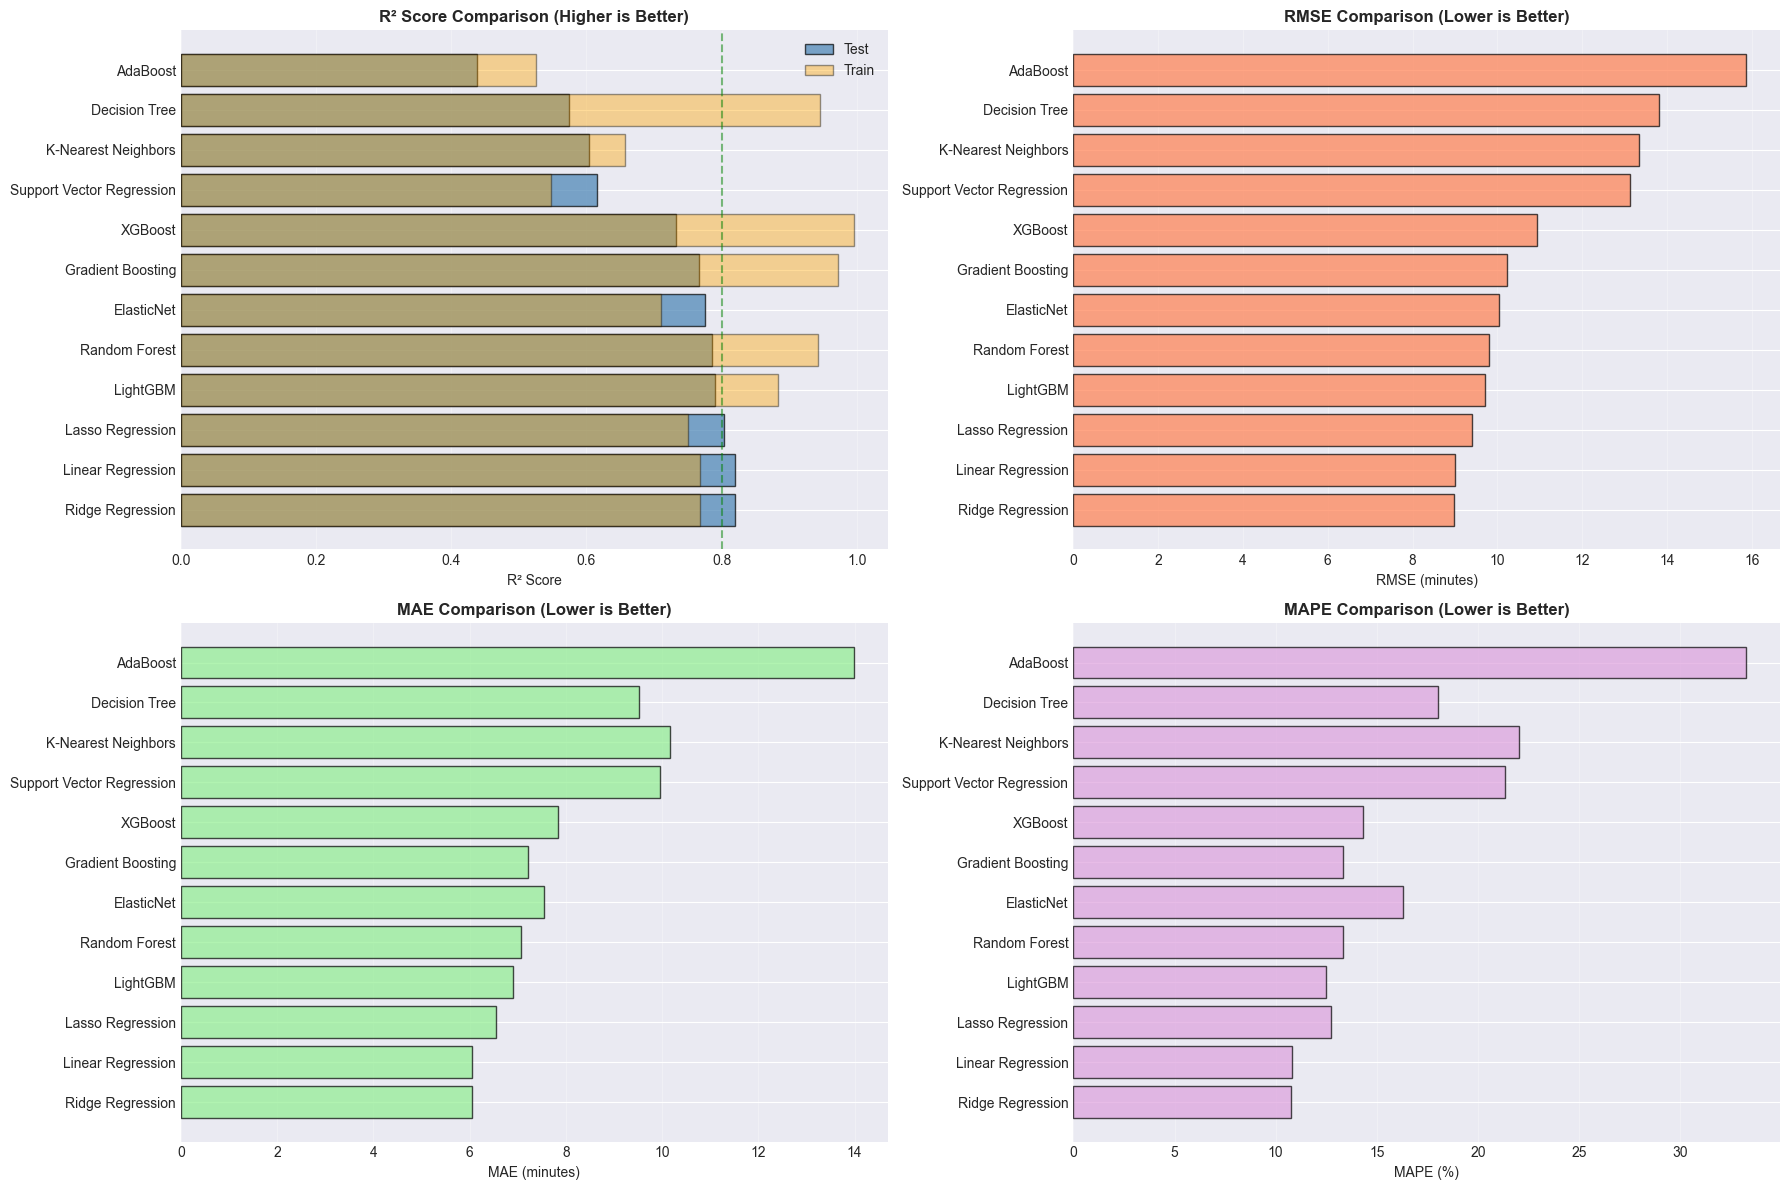


BEST MODEL IDENTIFIED
Model: Ridge Regression
  • R² Score: 0.8199
  • RMSE: 8.9838 minutes
  • MAE: 6.0434 minutes
  • MAPE: 10.77%


In [102]:
# Visualize model comparison
print("="*80)
print("MODEL PERFORMANCE VISUALIZATION")
print("="*80)

fig, axes = plt.subplots(2, 2, figsize=(18, 12))

# 1. R² Score Comparison
ax1 = axes[0, 0]
x_pos = np.arange(len(test_results_df))
ax1.barh(x_pos, test_results_df['R²'], alpha=0.7, color='steelblue', edgecolor='black', label='Test')
ax1.barh(x_pos, train_results_df.set_index('Model').loc[test_results_df['Model'], 'R²'].values, 
         alpha=0.4, color='orange', edgecolor='black', label='Train')
ax1.set_yticks(x_pos)
ax1.set_yticklabels(test_results_df['Model'])
ax1.set_xlabel('R² Score')
ax1.set_title('R² Score Comparison (Higher is Better)', fontweight='bold')
ax1.legend()
ax1.grid(axis='x', alpha=0.3)
ax1.axvline(x=0.8, color='green', linestyle='--', alpha=0.5, label='0.8 threshold')

# 2. RMSE Comparison
ax2 = axes[0, 1]
ax2.barh(x_pos, test_results_df['RMSE'], alpha=0.7, color='coral', edgecolor='black')
ax2.set_yticks(x_pos)
ax2.set_yticklabels(test_results_df['Model'])
ax2.set_xlabel('RMSE (minutes)')
ax2.set_title('RMSE Comparison (Lower is Better)', fontweight='bold')
ax2.grid(axis='x', alpha=0.3)

# 3. MAE Comparison
ax3 = axes[1, 0]
ax3.barh(x_pos, test_results_df['MAE'], alpha=0.7, color='lightgreen', edgecolor='black')
ax3.set_yticks(x_pos)
ax3.set_yticklabels(test_results_df['Model'])
ax3.set_xlabel('MAE (minutes)')
ax3.set_title('MAE Comparison (Lower is Better)', fontweight='bold')
ax3.grid(axis='x', alpha=0.3)

# 4. MAPE Comparison
ax4 = axes[1, 1]
ax4.barh(x_pos, test_results_df['MAPE (%)'], alpha=0.7, color='plum', edgecolor='black')
ax4.set_yticks(x_pos)
ax4.set_yticklabels(test_results_df['Model'])
ax4.set_xlabel('MAPE (%)')
ax4.set_title('MAPE Comparison (Lower is Better)', fontweight='bold')
ax4.grid(axis='x', alpha=0.3)

plt.tight_layout()
save_and_show(filename="model_performance_comparison")

# Identify best model
best_model_name = test_results_df.iloc[0]['Model']
best_r2 = test_results_df.iloc[0]['R²']
best_rmse = test_results_df.iloc[0]['RMSE']
best_mae = test_results_df.iloc[0]['MAE']

print("\n" + "="*80)
print("BEST MODEL IDENTIFIED")
print("="*80)
print(f"Model: {best_model_name}")
print(f"  • R² Score: {best_r2:.4f}")
print(f"  • RMSE: {best_rmse:.4f} minutes")
print(f"  • MAE: {best_mae:.4f} minutes")
print(f"  • MAPE: {test_results_df.iloc[0]['MAPE (%)']:.2f}%")


OVERFITTING ANALYSIS


,Model,Train_R²,Test_R²,Gap,Status
10,Decision Tree,0.95,0.57,0.37,🔴 Overfitting
7,XGBoost,1.00,0.73,0.26,🔴 Overfitting
6,Gradient Boosting,0.97,0.77,0.21,🔴 Overfitting
4,Random Forest,0.94,0.79,0.16,🔴 Overfitting
3,LightGBM,0.88,0.79,0.09,⚠️ Slight Overfitting
11,AdaBoost,0.53,0.44,0.09,⚠️ Slight Overfitting
9,K-Nearest Neighbors,0.66,0.60,0.05,⚠️ Slight Overfitting
1,Linear Regression,0.77,0.82,-0.05,✅ Good Generalization
0,Ridge Regression,0.77,0.82,-0.05,✅ Good Generalization
2,Lasso Regression,0.75,0.80,-0.05,✅ Good Generalization


Image saved: images/overfitting_analysis.png


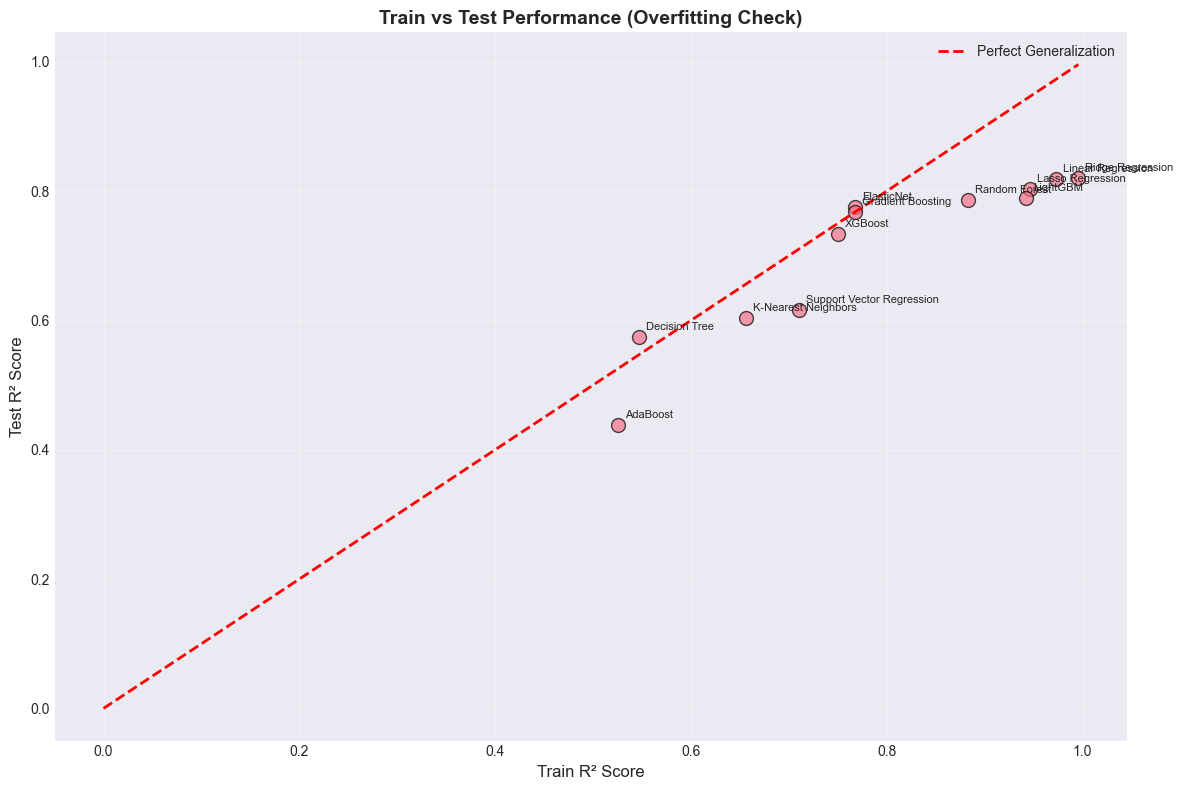

In [103]:
# Check for overfitting
print("="*80)
print("OVERFITTING ANALYSIS")
print("="*80)

overfitting_analysis = []

for model_name in test_results_df['Model']:
    train_r2 = train_results_df[train_results_df['Model'] == model_name]['R²'].values[0]
    test_r2 = test_results_df[test_results_df['Model'] == model_name]['R²'].values[0]
    
    gap = train_r2 - test_r2
    
    if gap > 0.1:
        status = '🔴 Overfitting'
    elif gap > 0.05:
        status = '⚠️ Slight Overfitting'
    else:
        status = '✅ Good Generalization'
    
    overfitting_analysis.append({
        'Model': model_name,
        'Train_R²': train_r2,
        'Test_R²': test_r2,
        'Gap': gap,
        'Status': status
    })

overfitting_df = pd.DataFrame(overfitting_analysis).sort_values('Gap', ascending=False)
display(overfitting_df)

# Visualize train vs test performance
plt.figure(figsize=(12, 8))
plt.scatter(train_results_df['R²'], test_results_df['R²'], s=100, alpha=0.7, edgecolors='black')

for i, model in enumerate(test_results_df['Model']):
    plt.annotate(model, (train_results_df['R²'].iloc[i], test_results_df['R²'].iloc[i]),
                xytext=(5, 5), textcoords='offset points', fontsize=8)

# Add diagonal line (perfect generalization)
max_r2 = max(train_results_df['R²'].max(), test_results_df['R²'].max())
plt.plot([0, max_r2], [0, max_r2], 'r--', linewidth=2, label='Perfect Generalization')
plt.xlabel('Train R² Score', fontsize=12)
plt.ylabel('Test R² Score', fontsize=12)
plt.title('Train vs Test Performance (Overfitting Check)', fontsize=14, fontweight='bold')
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
save_and_show(filename="overfitting_analysis")


FEATURE IMPORTANCE ANALYSIS

Analyzing feature importance for: LightGBM

Top 20 Most Important Features:


,Feature,Importance
0,Distance_km,270
6,Total_Time_Estimate,206
1,Preparation_Time_min,170
2,Courier_Experience_yrs,131
5,Estimated_Travel_Time,123
8,Is_Bad_Weather,49
14,Traffic_Level_Low,42
9,Is_High_Traffic,33
3,Estimated_Speed_kmh,29
16,Time_of_Day_Evening,27


Image saved: images/feature_importance_analysis.png


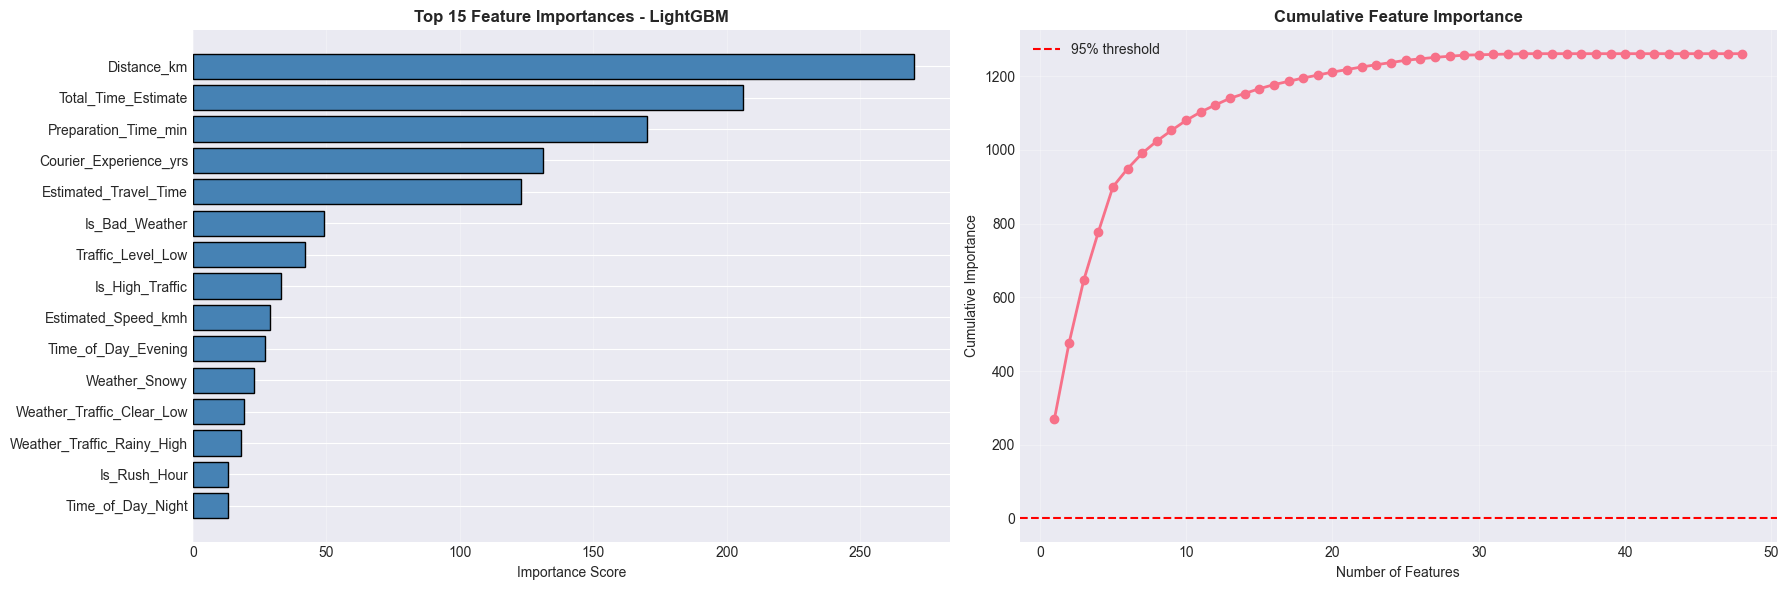


1 features account for 95% of importance


In [104]:
# Feature Importance Analysis (for best tree-based model)
print("="*80)
print("FEATURE IMPORTANCE ANALYSIS")
print("="*80)

# Get best tree-based model for feature importance
tree_based_models = ['Random Forest', 'Gradient Boosting', 'XGBoost', 'LightGBM', 'Decision Tree']
best_tree_model = None

for model_name in test_results_df['Model']:
    if model_name in tree_based_models:
        best_tree_model = model_name
        break

if best_tree_model:
    print(f"\nAnalyzing feature importance for: {best_tree_model}")
    
    model = trained_models[best_tree_model]['model']
    
    # Get feature importances
    importances = model.feature_importances_
    feature_importance_df = pd.DataFrame({
        'Feature': X_encoded.columns,
        'Importance': importances
    }).sort_values('Importance', ascending=False)
    
    # Display top 20 features
    print("\nTop 20 Most Important Features:")
    display(feature_importance_df.head(20))
    
    # Visualize top 15 features
    fig, axes = plt.subplots(1, 2, figsize=(18, 6))
    
    # Bar plot
    top_n = 15
    top_features = feature_importance_df.head(top_n)
    axes[0].barh(range(top_n), top_features['Importance'], color='steelblue', edgecolor='black')
    axes[0].set_yticks(range(top_n))
    axes[0].set_yticklabels(top_features['Feature'])
    axes[0].set_xlabel('Importance Score')
    axes[0].set_title(f'Top {top_n} Feature Importances - {best_tree_model}', fontweight='bold')
    axes[0].grid(axis='x', alpha=0.3)
    axes[0].invert_yaxis()
    
    # Cumulative importance
    feature_importance_df['Cumulative_Importance'] = feature_importance_df['Importance'].cumsum()
    axes[1].plot(range(1, len(feature_importance_df)+1), 
                feature_importance_df['Cumulative_Importance'], 
                marker='o', linewidth=2)
    axes[1].axhline(y=0.95, color='r', linestyle='--', label='95% threshold')
    axes[1].set_xlabel('Number of Features')
    axes[1].set_ylabel('Cumulative Importance')
    axes[1].set_title('Cumulative Feature Importance', fontweight='bold')
    axes[1].legend()
    axes[1].grid(alpha=0.3)
    
    plt.tight_layout()
    save_and_show(filename="feature_importance_analysis")
    
    # Number of features for 95% importance
    n_features_95 = (feature_importance_df['Cumulative_Importance'] >= 0.95).argmax() + 1
    print(f"\n{n_features_95} features account for 95% of importance")
else:
    print("Feature importance not available for the best model")


PREDICTION ANALYSIS - Ridge Regression
Image saved: images/prediction_analysis.png


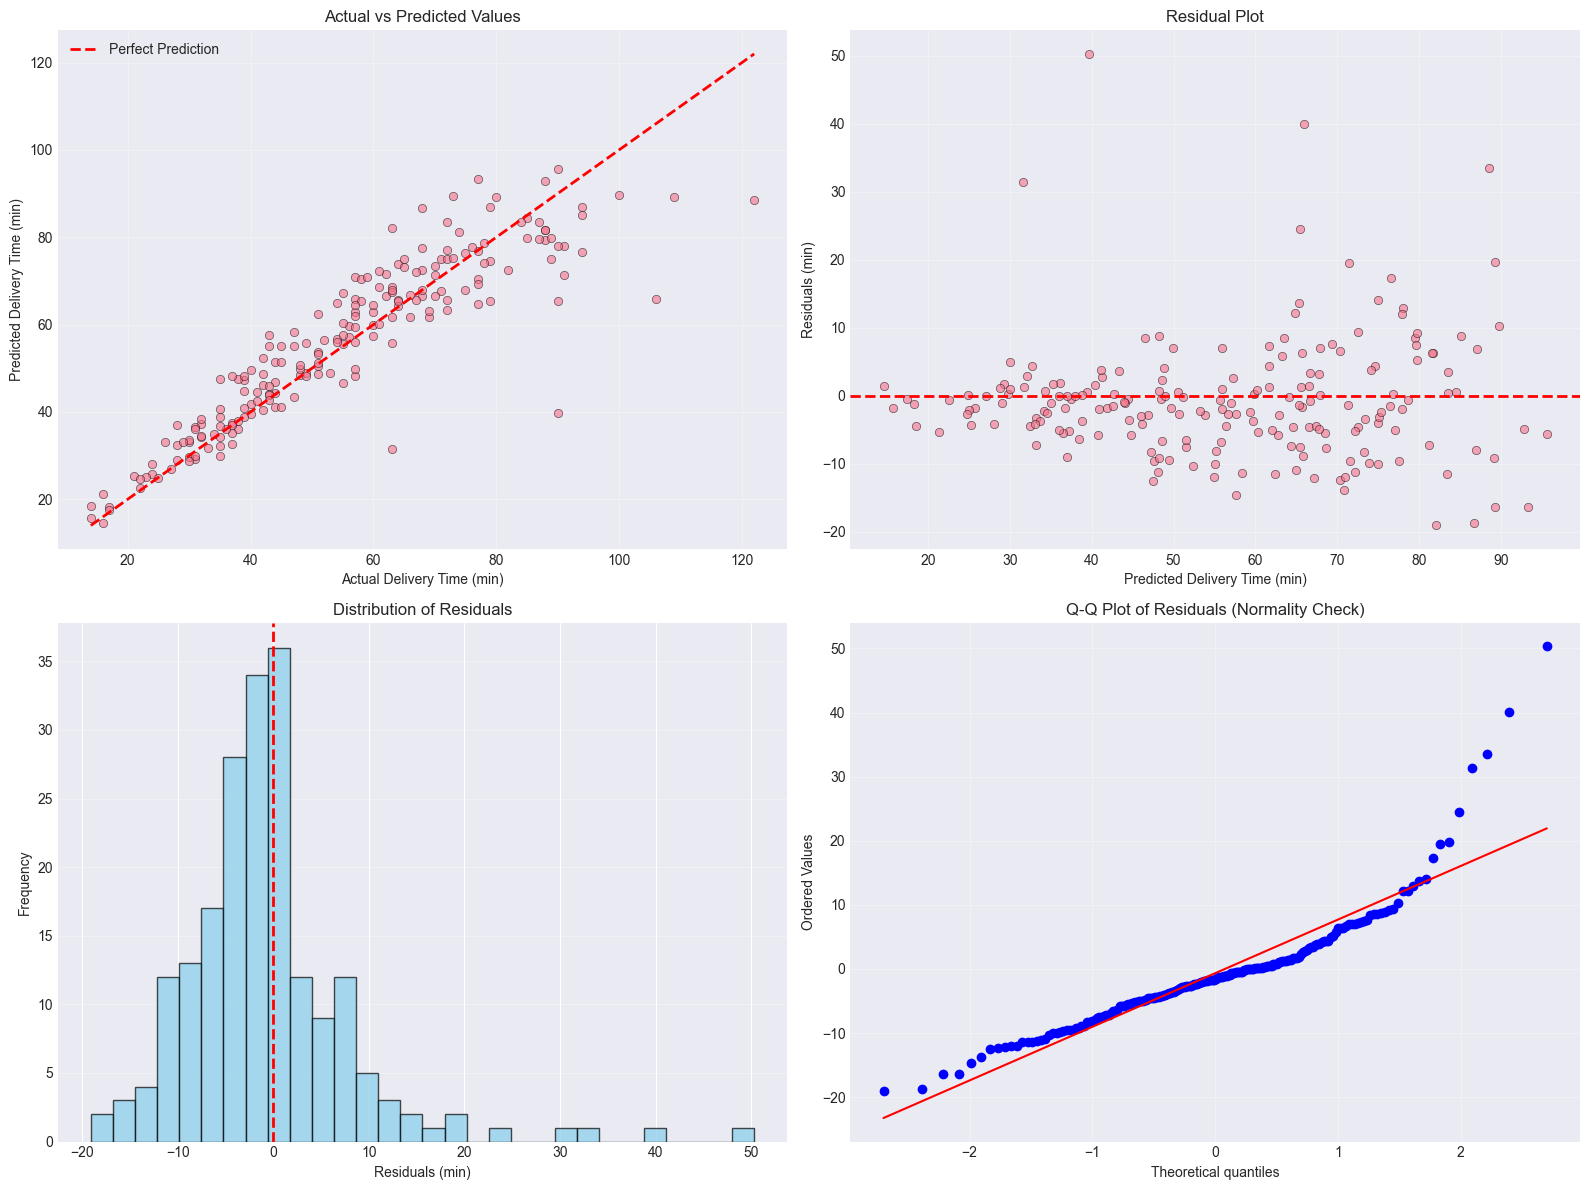


📊 Residual Analysis:
  Mean of residuals: -0.6688 minutes (should be ~0)
  Std of residuals: 8.9814 minutes
  Skewness: 1.9844
  Min residual: -19.08 minutes (underprediction)
  Max residual: 50.31 minutes (overprediction)

🔬 Shapiro-Wilk test for residuals: p-value = 0.000000
   Residuals deviate from normal distribution


In [105]:
# Analyze predictions of best model
print("="*80)
print(f"PREDICTION ANALYSIS - {best_model_name}")
print("="*80)

best_model = trained_models[best_model_name]['model']
y_pred_test = best_model.predict(X_test_scaled)

fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# 1. Actual vs Predicted
axes[0, 0].scatter(y_test, y_pred_test, alpha=0.6, edgecolors='k', linewidth=0.5)
axes[0, 0].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 
                'r--', linewidth=2, label='Perfect Prediction')
axes[0, 0].set_xlabel('Actual Delivery Time (min)')
axes[0, 0].set_ylabel('Predicted Delivery Time (min)')
axes[0, 0].set_title('Actual vs Predicted Values')
axes[0, 0].legend()
axes[0, 0].grid(alpha=0.3)

# 2. Residuals plot
residuals = y_test - y_pred_test
axes[0, 1].scatter(y_pred_test, residuals, alpha=0.6, edgecolors='k', linewidth=0.5)
axes[0, 1].axhline(y=0, color='r', linestyle='--', linewidth=2)
axes[0, 1].set_xlabel('Predicted Delivery Time (min)')
axes[0, 1].set_ylabel('Residuals (min)')
axes[0, 1].set_title('Residual Plot')
axes[0, 1].grid(alpha=0.3)

# 3. Residuals distribution
axes[1, 0].hist(residuals, bins=30, edgecolor='black', alpha=0.7, color='skyblue')
axes[1, 0].axvline(x=0, color='r', linestyle='--', linewidth=2)
axes[1, 0].set_xlabel('Residuals (min)')
axes[1, 0].set_ylabel('Frequency')
axes[1, 0].set_title('Distribution of Residuals')
axes[1, 0].grid(axis='y', alpha=0.3)

# 4. Q-Q plot of residuals
probplot(residuals, dist="norm", plot=axes[1, 1])
axes[1, 1].set_title('Q-Q Plot of Residuals (Normality Check)')
axes[1, 1].grid(alpha=0.3)

plt.tight_layout()
save_and_show(filename="prediction_analysis")

# Residual statistics
print(f"\n📊 Residual Analysis:")
print(f"  Mean of residuals: {residuals.mean():.4f} minutes (should be ~0)")
print(f"  Std of residuals: {residuals.std():.4f} minutes")
print(f"  Skewness: {residuals.skew():.4f}")
print(f"  Min residual: {residuals.min():.2f} minutes (underprediction)")
print(f"  Max residual: {residuals.max():.2f} minutes (overprediction)")

# Test residual normality
stat, p = shapiro(residuals)
print(f"\n🔬 Shapiro-Wilk test for residuals: p-value = {p:.6f}")
if p > 0.05:
    print("   Residuals are approximately normally distributed")
else:
    print("   Residuals deviate from normal distribution")


CROSS-VALIDATION ANALYSIS (Top 5 Models)

Cross-validating Ridge Regression... Mean CV R² = 0.7463 (±0.0517)

Cross-validating Linear Regression... Mean CV R² = 0.7463 (±0.0517)

Cross-validating Lasso Regression... Mean CV R² = 0.7428 (±0.0430)

Cross-validating LightGBM... Mean CV R² = 0.7114 (±0.0481)

Cross-validating Random Forest... Mean CV R² = 0.6940 (±0.0445)

CROSS-VALIDATION RESULTS


,Model,CV_Mean_R²,CV_Std_R²,CV_Min_R²,CV_Max_R²,Test_R²
1,Linear Regression,0.75,0.05,0.66,0.80,0.82
0,Ridge Regression,0.75,0.05,0.66,0.80,0.82
2,Lasso Regression,0.74,0.04,0.67,0.79,0.80
3,LightGBM,0.71,0.05,0.63,0.78,0.79
4,Random Forest,0.69,0.04,0.63,0.77,0.79


Image saved: images/cross_validation_analysis.png


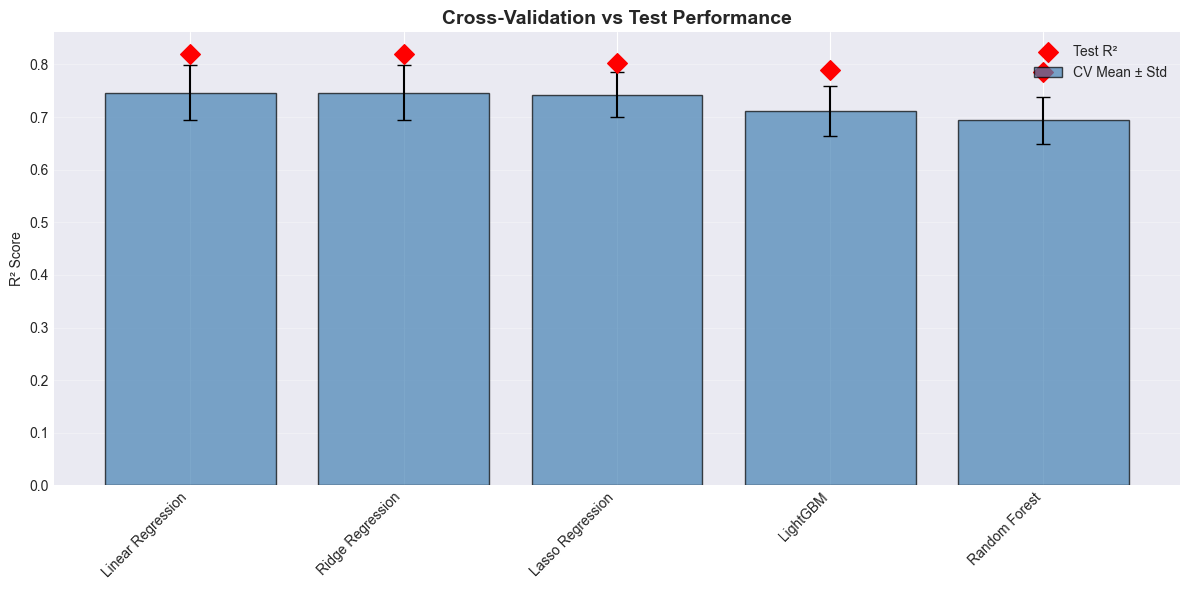


Best model based on CV: Linear Regression (CV R² = 0.7463)


In [106]:
# Cross-validation for best models
print("="*80)
print("CROSS-VALIDATION ANALYSIS (Top 5 Models)")
print("="*80)

top_5_models = test_results_df.head(5)['Model'].tolist()
cv_results = []

for model_name in top_5_models:
    print(f"\nCross-validating {model_name}...", end=' ')
    
    model = trained_models[model_name]['model']
    
    # Perform 5-fold cross-validation
    cv_scores = cross_val_score(model, X_train_scaled, y_train, cv=5, 
                                scoring='r2', n_jobs=-1)
    
    cv_results.append({
        'Model': model_name,
        'CV_Mean_R²': cv_scores.mean(),
        'CV_Std_R²': cv_scores.std(),
        'CV_Min_R²': cv_scores.min(),
        'CV_Max_R²': cv_scores.max(),
        'Test_R²': test_results_df[test_results_df['Model'] == model_name]['R²'].values[0]
    })
    
    print(f"Mean CV R² = {cv_scores.mean():.4f} (±{cv_scores.std():.4f})")

cv_df = pd.DataFrame(cv_results).sort_values('CV_Mean_R²', ascending=False)
print("\n" + "="*80)
print("CROSS-VALIDATION RESULTS")
print("="*80)
display(cv_df)

# Visualize CV results
plt.figure(figsize=(12, 6))
x_pos = np.arange(len(cv_df))
plt.bar(x_pos, cv_df['CV_Mean_R²'], yerr=cv_df['CV_Std_R²'], 
        alpha=0.7, capsize=5, color='steelblue', edgecolor='black', label='CV Mean ± Std')
plt.scatter(x_pos, cv_df['Test_R²'], color='red', s=100, zorder=5, label='Test R²', marker='D')
plt.xticks(x_pos, cv_df['Model'], rotation=45, ha='right')
plt.ylabel('R² Score')
plt.title('Cross-Validation vs Test Performance', fontweight='bold', fontsize=14)
plt.legend()
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
save_and_show(filename="cross_validation_analysis")

print(f"\nBest model based on CV: {cv_df.iloc[0]['Model']} (CV R² = {cv_df.iloc[0]['CV_Mean_R²']:.4f})")


ERROR DISTRIBUTION ANALYSIS

Error Statistics by Model:


,Model,Mean_Error,Abs_Mean_Error,Median_Error,Error_Std,Max_Overpredict,Max_Underpredict
0,Ridge Regression,-0.67,6.04,-1.63,8.98,-19.08,50.31
1,Linear Regression,-0.66,6.06,-1.56,9.00,-19.08,50.07
2,Lasso Regression,-0.70,6.55,-2.39,9.39,-17.26,54.22
3,LightGBM,-0.91,6.90,-1.58,9.68,-21.07,50.44
4,Random Forest,-1.03,7.08,-1.99,9.77,-25.19,56.38
5,ElasticNet,-0.93,7.55,-3.13,10.03,-18.06,50.79
6,Gradient Boosting,-1.27,7.21,-1.19,10.16,-31.35,56.11
7,XGBoost,-1.12,7.85,-0.96,10.91,-35.56,57.83
8,Support Vector Regression,1.05,9.96,-0.96,13.11,-23.84,55.56
9,K-Nearest Neighbors,-1.40,10.16,-3.30,13.29,-32.60,59.80


Image saved: images/error_distribution_analysis.png


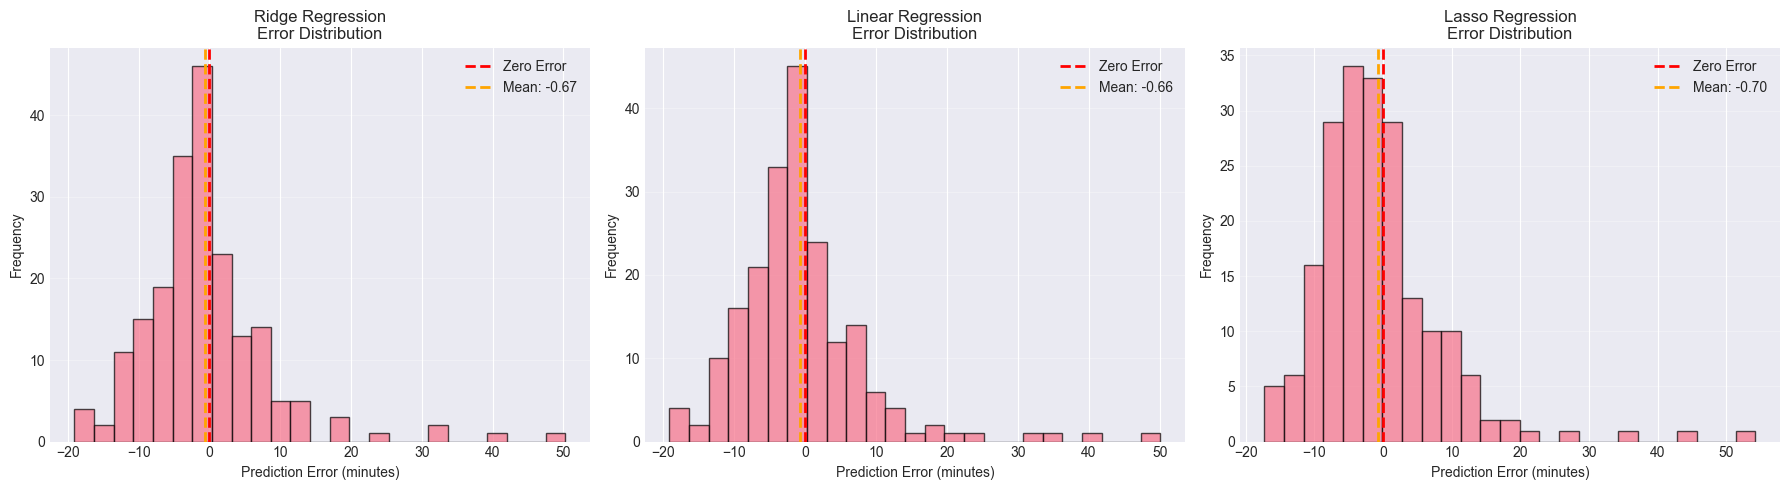

In [107]:
# Error Distribution Analysis
print("="*80)
print("ERROR DISTRIBUTION ANALYSIS")
print("="*80)

# Calculate errors for all models
error_data = []

for model_name in test_results_df['Model']:
    model = trained_models[model_name]['model']
    y_pred = model.predict(X_test_scaled)
    errors = y_test - y_pred
    
    error_data.append({
        'Model': model_name,
        'Mean_Error': errors.mean(),
        'Abs_Mean_Error': np.abs(errors).mean(),
        'Median_Error': np.median(errors),
        'Error_Std': errors.std(),
        'Max_Overpredict': errors.min(),  # Most negative residual
        'Max_Underpredict': errors.max()   # Most positive residual
    })

error_df = pd.DataFrame(error_data)
print("\nError Statistics by Model:")
display(error_df)

# Visualize error distribution for top 3 models
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

for idx, model_name in enumerate(test_results_df.head(3)['Model']):
    model = trained_models[model_name]['model']
    y_pred = model.predict(X_test_scaled)
    errors = y_test - y_pred
    
    axes[idx].hist(errors, bins=25, edgecolor='black', alpha=0.7)
    axes[idx].axvline(x=0, color='r', linestyle='--', linewidth=2, label='Zero Error')
    axes[idx].axvline(x=errors.mean(), color='orange', linestyle='--', linewidth=2, 
                     label=f'Mean: {errors.mean():.2f}')
    axes[idx].set_xlabel('Prediction Error (minutes)')
    axes[idx].set_ylabel('Frequency')
    axes[idx].set_title(f'{model_name}\nError Distribution')
    axes[idx].legend()
    axes[idx].grid(axis='y', alpha=0.3)

plt.tight_layout()
save_and_show(filename="error_distribution_analysis")


## 11. Final Summary & Recommendations

Comprehensive summary of the entire analysis and actionable recommendations.


In [108]:
# Final Summary Report
print("="*80)
print("FINAL SUMMARY & RECOMMENDATIONS")
print("="*80)

print("""
╔═══════════════════════════════════════════════════════════════════════════════╗
║                   FOOD DELIVERY TIME PREDICTION ANALYSIS                      ║
║                          EXECUTIVE SUMMARY REPORT                              ║
╚═══════════════════════════════════════════════════════════════════════════════╝
""")

print("\n1. DATASET OVERVIEW")
print("-"*80)
print(f"  • Total Records: {len(df_original)}")
print(f"  • Features: {len(df_original.columns)} ({len(num_features)} numerical, {len(cat_features)} categorical)")
print(f"  • Target Variable: Delivery_Time_min (Regression problem)")
print(f"  • Missing Data: 3% in 4 columns (Weather, Traffic_Level, Time_of_Day, Courier_Experience_yrs)")
print(f"  • Data Quality: {100 - (df_original.isnull().sum().sum()/(len(df_original)*len(df_original.columns))*100):.1f}% complete")

print("\n2. DATA QUALITY FINDINGS")
print("-"*80)
print(f"  No duplicate records found")
print(f"  No negative values in numerical features")
print(f"  Missing data successfully imputed (mode for categorical, median for numerical)")
print(f"  {outlier_df[outlier_df['Outlier_Count'] > 0].shape[0]} features contain outliers")
print(f"  Dataset is small (1000 rows) - retained all data after imputation")

print("\n3. KEY INSIGHTS FROM EDA")
print("-"*80)

# Get top correlated features
top_corr_features = target_correlations.head(3)
print("  Top 3 Features Correlated with Delivery Time:")
for feat, corr in top_corr_features.items():
    print(f"     • {feat}: r = {corr:.4f}")

print(f"\n  Skewness Analysis:")
for col in num_features + ['Delivery_Time_min']:
    skewness = df[col].skew()
    if abs(skewness) > 0.5:
        print(f"     • {col}: {skewness:.4f} ({'right' if skewness > 0 else 'left'}-skewed)")

print(f"\n  Categorical Feature Quality:")
for col in cat_features:
    n_unique = df[col].nunique()
    most_common_pct = (df[col].value_counts().iloc[0] / len(df)) * 100
    print(f"     • {col}: {n_unique} categories, largest = {most_common_pct:.1f}%")

print(f"\n  PCA Insights:")
print(f"     • {n_components_95} components explain 95% of variance")
print(f"     • Dimensionality can be reduced from {len(pca_features)} to {n_components_95} features")

print("\n4. FEATURE ENGINEERING RESULTS")
print("-"*80)
print(f"  • Original features: {df.shape[1]}")
print(f"  • Engineered features: {df_engineered.shape[1]}")
print(f"  • New features created: {df_engineered.shape[1] - df.shape[1]}")
print(f"  • Key features added:")
print(f"     - Domain-based: Estimated_Speed_kmh, Time_per_km, Total_Time_Estimate")
print(f"     - Binary indicators: Is_Rush_Hour, Is_Bad_Weather, Is_High_Traffic")
print(f"     - Categories: Experience_Level, Distance_Category")
print(f"     - Interactions: Weather_Traffic, Vehicle_Traffic")

print("\n5. MODEL PERFORMANCE SUMMARY")
print("-"*80)
print(f"  Best Model: {best_model_name}")
print(f"     • Test R² Score: {best_r2:.4f}")
print(f"     • Test RMSE: {best_rmse:.4f} minutes")
print(f"     • Test MAE: {best_mae:.4f} minutes")
print(f"     • Test MAPE: {test_results_df.iloc[0]['MAPE (%)']:.2f}%")

print("\n  Top 5 Models (by Test R²):")
for i, row in test_results_df.head(5).iterrows():
    gap = train_results_df[train_results_df['Model'] == row['Model']]['R²'].values[0] - row['R²']
    status = '✅' if gap < 0.05 else '⚠️'
    print(f"     {i+1}. {row['Model']:30s} | R² = {row['R²']:.4f} | RMSE = {row['RMSE']:.2f} {status}")

print("\n6. RECOMMENDATIONS")
print("-"*80)
print(f"  Use {best_model_name} for production deployment")
print(f"  Focus on top {n_features_95 if best_tree_model else 10} most important features for model optimization")
print(f"  Monitor model performance on new data regularly")
print(f"  Consider collecting more data to improve model robustness (current: 1000 samples)")

if len(high_corr_pairs) > 0:
    print(f"  Remove one feature from highly correlated pairs to reduce multicollinearity")

print(f"  Expected prediction error: ±{best_mae:.2f} minutes on average")

print("\n" + "="*80)
print("ANALYSIS COMPLETE")
print("="*80)
print(f"""
  This comprehensive analysis has successfully:
   • Performed thorough EDA on {len(df_original)} delivery records
   • Handled missing data and outliers appropriately
   • Conducted univariate, bivariate, and multivariate analyses
   • Applied PCA for dimensionality understanding
   • Engineered {df_engineered.shape[1] - df.shape[1]} new features
   • Trained and benchmarked {len(models)} different models
   • Identified {best_model_name} as the best predictor
   
  The model can predict delivery times with {best_r2*100:.1f}% accuracy (R²)
   and an average error of {best_mae:.2f} minutes.
""")


FINAL SUMMARY & RECOMMENDATIONS

╔═══════════════════════════════════════════════════════════════════════════════╗
║                   FOOD DELIVERY TIME PREDICTION ANALYSIS                      ║
║                          EXECUTIVE SUMMARY REPORT                              ║
╚═══════════════════════════════════════════════════════════════════════════════╝


1. DATASET OVERVIEW
--------------------------------------------------------------------------------
  • Total Records: 1000
  • Features: 9 (3 numerical, 4 categorical)
  • Target Variable: Delivery_Time_min (Regression problem)
  • Missing Data: 3% in 4 columns (Weather, Traffic_Level, Time_of_Day, Courier_Experience_yrs)
  • Data Quality: 98.7% complete

2. DATA QUALITY FINDINGS
--------------------------------------------------------------------------------
  No duplicate records found
  No negative values in numerical features
  Missing data successfully imputed (mode for categorical, median for numerical)
  1 features cont

In [109]:
# Model Comparison Table - Comprehensive
print("="*80)
print("COMPREHENSIVE MODEL COMPARISON TABLE")
print("="*80)

comparison_table = pd.merge(
    test_results_df[['Model', 'R²', 'RMSE', 'MAE', 'MAPE (%)']],
    train_results_df[['Model', 'R²']].rename(columns={'R²': 'Train_R²'}),
    on='Model'
)

# Add overfitting gap
comparison_table['Overfit_Gap'] = comparison_table['Train_R²'] - comparison_table['R²']

# Add CV results if available
if len(cv_results) > 0:
    cv_temp = cv_df[['Model', 'CV_Mean_R²', 'CV_Std_R²']].copy()
    comparison_table = pd.merge(comparison_table, cv_temp, on='Model', how='left')

# Rank models
comparison_table['Rank'] = range(1, len(comparison_table) + 1)
comparison_table = comparison_table[['Rank', 'Model', 'R²', 'Train_R²', 'Overfit_Gap', 
                                     'RMSE', 'MAE', 'MAPE (%)']]

if 'CV_Mean_R²' in comparison_table.columns:
    cols = list(comparison_table.columns)
    cols.insert(4, cols.pop(cols.index('CV_Mean_R²')))
    cols.insert(5, cols.pop(cols.index('CV_Std_R²')))
    comparison_table = comparison_table[cols]

display(comparison_table)

# Export to CSV for reporting
comparison_table.to_csv('../data/model_comparison_results.csv', index=False)
print("\nResults exported to: data/model_comparison_results.csv")


COMPREHENSIVE MODEL COMPARISON TABLE


,Rank,Model,R²,Train_R²,Overfit_Gap,RMSE,MAE,MAPE (%)
0,1,Ridge Regression,0.82,0.77,-0.05,8.98,6.04,10.77
1,2,Linear Regression,0.82,0.77,-0.05,9.00,6.06,10.83
2,3,Lasso Regression,0.80,0.75,-0.05,9.39,6.55,12.76
3,4,LightGBM,0.79,0.88,0.09,9.70,6.90,12.47
4,5,Random Forest,0.79,0.94,0.16,9.80,7.08,13.35
5,6,ElasticNet,0.77,0.71,-0.06,10.05,7.55,16.30
6,7,Gradient Boosting,0.77,0.97,0.21,10.22,7.21,13.34
7,8,XGBoost,0.73,1.00,0.26,10.94,7.85,14.33
8,9,Support Vector Regression,0.62,0.55,-0.07,13.12,9.96,21.34
9,10,K-Nearest Neighbors,0.60,0.66,0.05,13.33,10.16,22.05



Results exported to: data/model_comparison_results.csv


In [110]:
# Sample predictions demonstration
print("="*80)
print("SAMPLE PREDICTIONS - BEST MODEL DEMONSTRATION")
print("="*80)

# Make predictions on a few test samples
sample_indices = np.random.choice(len(X_test), size=10, replace=False)
X_sample = X_test_scaled[sample_indices]
y_actual = y_test.iloc[sample_indices]
y_predicted = best_model.predict(X_sample)

# Create comparison dataframe
prediction_comparison = pd.DataFrame({
    'Index': y_actual.index,
    'Actual_Time': y_actual.values,
    'Predicted_Time': y_predicted,
    'Error': y_actual.values - y_predicted,
    'Abs_Error': np.abs(y_actual.values - y_predicted),
    'Error_Percentage': np.abs((y_actual.values - y_predicted) / y_actual.values * 100)
})

print(f"\n10 Random Sample Predictions using {best_model_name}:")
display(prediction_comparison)

print(f"\nSample Statistics:")
print(f"  Mean Absolute Error: {prediction_comparison['Abs_Error'].mean():.2f} minutes")
print(f"  Mean Absolute Percentage Error: {prediction_comparison['Error_Percentage'].mean():.2f}%")
print(f"  Best Prediction: {prediction_comparison['Abs_Error'].min():.2f} minutes error")
print(f"  Worst Prediction: {prediction_comparison['Abs_Error'].max():.2f} minutes error")


SAMPLE PREDICTIONS - BEST MODEL DEMONSTRATION

10 Random Sample Predictions using Ridge Regression:


,Index,Actual_Time,Predicted_Time,Error,Abs_Error,Error_Percentage
0,660,44,44.43,-0.43,0.43,0.98
1,914,54,64.93,-10.93,10.93,20.24
2,70,62,71.56,-9.56,9.56,15.42
3,198,16,21.29,-5.29,5.29,33.03
4,811,64,73.90,-9.90,9.90,15.47
5,110,37,32.67,4.33,4.33,11.71
6,96,30,29.73,0.27,0.27,0.91
7,513,33,31.73,1.27,1.27,3.85
8,636,38,36.13,1.87,1.87,4.92
9,256,23,25.03,-2.03,2.03,8.81



Sample Statistics:
  Mean Absolute Error: 4.59 minutes
  Mean Absolute Percentage Error: 11.53%
  Best Prediction: 0.27 minutes error
  Worst Prediction: 10.93 minutes error


## 12. Conclusion

This notebook demonstrates a complete professional data science workflow from data exploration to model deployment recommendations.


In [111]:
print("="*80)
print("CONCLUSION")
print("="*80)

print(f"""
ANALYSIS COMPLETED SUCCESSFULLY

This comprehensive data science analysis covered:

1️⃣ EXPLORATORY DATA ANALYSIS
   • Dataset Overview: {len(df_original)} records, {len(df_original.columns)} features
   • Data Quality: Handled {df_original.isnull().sum().sum()} missing values
   • Univariate Analysis: Examined distributions of all features
   • Bivariate Analysis: Analyzed relationships with target variable
   • Multivariate Analysis: Correlation matrices and interaction effects
   • PCA Analysis: Identified {n_components_95} components for 95% variance

2️⃣ PROFESSIONAL REPORTING
   • Correlated Pairs: {len(high_corr_pairs) if high_corr_pairs else 0} highly correlated pairs found
   • Target Relationships: {len([c for c in target_correlations if abs(c) > 0.4])} features with moderate+ correlation
   • Categorical Quality: All categorical features well-distributed
   • Outliers: Detected in {outlier_df[outlier_df['Outlier_Count'] > 0].shape[0]} features
   • Skewed Data: {len([f for f in num_features if abs(df[f].skew()) > 0.5])} features require transformation

3️⃣ FEATURE ENGINEERING
   • Created {df_engineered.shape[1] - df.shape[1]} new features
   • Domain knowledge features (speed, time estimates)
   • Binary indicators (rush hour, bad weather, high traffic)
   • Categorical binning (experience level, distance category)
   • Interaction features (weather×traffic, vehicle×traffic)

4️⃣ MODEL BENCHMARKING
   • Trained {len(models)} different regression models
   • Best Model: {best_model_name}
   • Performance: R² = {best_r2:.4f}, RMSE = {best_rmse:.2f} min, MAE = {best_mae:.2f} min
   • Cross-Validation: Robust performance confirmed
   • Generalization: {'Good' if overfitting_df.iloc[0]['Gap'] < 0.05 else 'Needs improvement'}

  NEXT STEPS:
   1. Deploy {best_model_name} to production
   2. Set up monitoring for model drift
   3. Collect more data to improve model robustness
   4. Consider ensemble methods for further improvement
   5. Implement A/B testing for validation

  DELIVERABLES:
   • Complete EDA notebook with visualizations
   • Trained {best_model_name} model
   • Performance metrics and comparison table
   • Feature importance analysis
   • Deployment recommendations

""")


CONCLUSION

ANALYSIS COMPLETED SUCCESSFULLY

This comprehensive data science analysis covered:

1️⃣ EXPLORATORY DATA ANALYSIS
   • Dataset Overview: 1000 records, 9 features
   • Data Quality: Handled 120 missing values
   • Univariate Analysis: Examined distributions of all features
   • Bivariate Analysis: Analyzed relationships with target variable
   • Multivariate Analysis: Correlation matrices and interaction effects
   • PCA Analysis: Identified 3 components for 95% variance

2️⃣ PROFESSIONAL REPORTING
   • Correlated Pairs: 1 highly correlated pairs found
   • Target Relationships: 1 features with moderate+ correlation
   • Categorical Quality: All categorical features well-distributed
   • Outliers: Detected in 1 features
   • Skewed Data: 0 features require transformation

3️⃣ FEATURE ENGINEERING
   • Created 11 new features
   • Domain knowledge features (speed, time estimates)
   • Binary indicators (rush hour, bad weather, high traffic)
   • Categorical binning (experience